# Game-Changing Analysis: Uncovering the Key Patterns for Successful Advertising Planning in Games

**Analyst : Ica Candra Rambadiana**<br>
*December, 2022*<br>
<br>
**Reviewed by Warrie Warrie**<br>
*DSNai - Data Science Nigeria | Machine Learning Engineer | GIS Data Specialist*<br>

<div class="alert alert-block alert-success">
<b>OVERALL REVIEWER'S COMMENT V3</b> <a class="tocSkip"></a>

Congratulation Ica on completing your project 🥳👏! <br>
    
    
You have done excellently well in your project.
    
Your conclusions and documentations are very very good 👌. This is a massive improvment from your last project, i am so proud of this tremendous growth. Keep it up 👏 <br> In addition, your visuals are good.
    
Another area of improvement you can checkout is in optimising your codes with `for..loop` to avoid repeatability of similar actions.  I have added some comments in yellow which you can check out. <br>  Thank for for submitting this amazing project<br>

&nbsp;

Good luck in future projects as you continue your journey in becoming a world class Data Scientist/Analyst! 

# Contents <a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#data_review)
    * [Intermediate Conclusions](#data_review_insight)
* [Stage 2. Data preprocessing](#data_preprocessing)
    * [2.1 Header style](#header_style)
    * [2.2 Duplicates](#duplicates)
    * [2.3 Missing values](#missing_values)
    * [2.4 Enriching Data](#enrich_data)
    * [2.5 Adjusting Data Type](#set_dtype)
    * [2.6 Describing Clean Dataset](#describe_data)
    * [2.7 Intermediate Conclusions](#data_preprocessing_insight)
* [Stage 3. Exploratory Data Analysis](#eda)
    * [3.1 Number of Released Games](#release_game)
    * [3.2 Platform Sales](#platform_sales)
    * [3.3 Genres and Sales](#genre)   
    * [3.4 ESRB and Sales](#esrb_region)
    * [3.5 Study in Popular Platform and Games](#game_reviews)
    * [3.6 Intermediate Conclusions](#eda_insight) 
* [Stage 4. Testing the hypotheses](#hypotheses)
    * [4.1 Hypothesis 1: User Scores Xbox One VS PC Platforms](#ratings_platform)
    * [4.2 Hypothesis 2: User Scores Action VS Sports Genres ](#ratings_genre)
    * [4.3 Intermediate Conclusions](#hypotheses_insight)
* [Conclusions](#end)

## Introduction <a id='intro'></a>

In this notebook, we will evaluate given data from the `online store Ice`, which sells video games worldwide. The data gather user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales in decades. All data are available from open sources. This analysis will help to provide insights for planning a campaign in 2017 for Sales and Marketing Teams.

### Objective

This analysis will identify patterns determining the successful game based on several indicators. We will spot potential big winners for the next advertising campaign planning. This analysis will use genre, platform, rating, and game sales for indicators.


### Stages 
There is no information about the quality of the data. Thus, we will evaluate the quality of the data and see whether its issues are significant. By conducting data preprocessing, we will account for the most critical problems. After that, we can test the hypotheses through a statistical test.

This project will consist of four stages:
 1. Data overview
 2. Data preprocessing
 3. Exploratory Data Analysis (EDA)
 4. Hypotheses Testing
 
### Hypotheses Test: 

1. Average user ratings of the Xbox One and PC platforms are the same
2. Average user ratings for the Action and Sports genres are the same

We will use an alpha threshold of 0.05. We will find which user score is higher or lower for the advanced test.

Let's get started!
 
[Back to Contents](#back)

## Stage 1. Data overview <a id='data_review'></a>

In [86]:
# load the libraries
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1.5)

from scipy import stats as st
import math as mt

import calendar
from warnings import filterwarnings
filterwarnings('ignore')

In [87]:
# import dataframe (df)

try:
    df = pd.read_csv('data/games.csv')
except:
    df = pd.read_csv('games.csv')

In [88]:
# retrieve the dataset
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [89]:
# check df shape

print(f'dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

dataframe has 16715 rows and 11 columns


In [90]:
# obtain general information about df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Note:**<br>
The raw dataset contains 11 columns. According to the documentation:
1. `Name` = Game name
2. `Platform` = Place for selling the game, the game console
3. `Year_of_Release` = Year of game release
4. `Genre` = genre type (sport, action, puzzle, simulation, etc)
5. `NA_sales` = North American sales (million usd)
6. `EU_sales` = Europe sales (million usd)
7. `JP_sales` = Japan sales (million usd)
8. `Other_sales` = Other countries sales (million usd)
9. `Critic_Score` = Experts rating score (maximum of 100)
10. `User_Score` = Users rating score (maximum of 10)
11. `Rating` = ESRB (The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature)

*Note: Data for 2016 may be incomplete*

In [91]:
# decribe dataset

df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Intermediate Conclusions <a id='data_review_insight'></a> 

Each row in the table stores general information about a game and its sales from various platforms in North America, Europe, Japan, and other countries. The games were released from 1980  to 2016.  

The data frame (df) values contain missing values in several columns. Several problems are discovered in this data frame, such as inappropriate datatype (`User_Score`), incomplete data for 2016, and inconvenient header format.

Next, the data frame needs to be preprocessed. 

[Back to Contents](#back)

## Stage 2. Data preprocessing <a id='data_preprocessing'></a>

To conduct a convenient analysis, I will adjust the header format into lowercase, set the appropriate datatype in each column, remove duplicates, handle the missing values, and enrich the dataframe with relevant information.

### Header style <a id='header_style'></a>

In [92]:
# lowercase the columns name
# shorten column name ('Year_of_Release')
# rename 'Rating' to avoid ambiguous

df = (df.rename(columns=str.lower)
        .rename(columns={'year_of_release':'year',
                         'rating':'esrb_rating'})
     )

# check the result

df.columns

Index(['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'critic_score', 'user_score', 'esrb_rating'],
      dtype='object')

### Duplicates <a id='duplicates'></a>

In [93]:
# detect obvious duplicates

df.duplicated().sum()

0

**Finding:**<br>
DataFrame has none explicit duplicates

### Missing values <a id='missing_values'></a>

In [94]:
# count the missing values

df.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
esrb_rating     6766
dtype: int64

**Findings:**<br>
Missing values are detected in columns `name`, `year`, `genre`, `critic_score`, `user_score`, and `rating`.<br>
Action from this will be further investigation about the missingness and handling the missing values if needed.

#### **name**

In [95]:
# check missingness in 'name'

df.loc[df['name'].isna()]

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [96]:
# drop NaN value in name
# since most of the columns are missing

# initialize clean_df
clean_df = df.dropna(subset=['name'])

# check the result
clean_df['name'].isna().sum()

0

In [97]:
# check missingness in 'critic_score'

clean_df['critic_score'].value_counts(dropna=False)

NaN     8576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
20.0       3
21.0       1
17.0       1
22.0       1
13.0       1
Name: critic_score, Length: 83, dtype: int64

**Findings:**<br>
The number of missing values in `critic_score` is quite large (+/- 50% data). The NaN values still contain other useful information. 

**Action:**<br>
The NaN values will be left, since the imputation for these values can trigger the accuration issue. This aims to avoid miss handling and also ease the EDA and hypotheses testing (easier to be exclude).  

#### **user_score**

In [98]:
# check missingness in 'user_score'

clean_df['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [99]:
# replace `tbd` with `NaN`
clean_df['user_score'].replace('tbd', np.NaN, inplace=True)

# check the results
clean_df['user_score'].value_counts(dropna=False)

NaN    9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

**Findings:**<br>
Besides NaN values, `user_score`column contains `tbd` or `to be determined` and `0` value, which means there is no `user_score` during data extraction.<br>

**Action:**<br>
The `tbd` and `0` values will be replaced with `NaN value`.<br>
Next, the `NaN` values will be left. This aims to avoid miss handling and also ease the EDA and hypotheses testing (easier to be exclude)

In [100]:
# replace `tbd` with `NaN`

clean_df['user_score'].replace(['tbd',0], np.NaN, inplace=True)

# check the results

clean_df['user_score'].value_counts(dropna=False)

NaN    9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.3       2
1.1       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

**Note:**<br>
The `tbd` and `0` values have been replaced with `NaN`successfully

#### **esrb_rating**

In [101]:
# check missingness in 'rating'

clean_df['esrb_rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: esrb_rating, dtype: int64

**Findings:**<br>
The amount of NaN values are high and we couldn't fill it with other values. Furthermore, we need to figure out those values for the analysis of the share <br>

**Action:**<br>
The NaN values will be replaced  with `unknown`

In [102]:
# impute NaN value with `unknown`

clean_df['esrb_rating'].fillna('unknown', inplace=True)

# check the result
clean_df['esrb_rating'].isna().sum()

0

**Note:**<br>
The `NaN` values have been replaced with `unknown` successfully

#### **year**

In [103]:
# check missingness in 'year'

nan_year = (clean_df[clean_df['year'].isna()]
                                     .sort_values(by='na_sales', ascending=False)
           )

nan_year.head(10)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,unknown
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,unknown
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,unknown
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T


In [104]:
# check `total_sales` proportion from games with missing values in year

(
nan_year[['na_sales', 'eu_sales' , 'jp_sales', 'other_sales']].sum().sum() /
clean_df[['na_sales', 'eu_sales' , 'jp_sales', 'other_sales']].sum().sum()
)

0.011098034508021168

**Findings:** <br>
The missing values in year only contributes 1% of `total_sales`

In [105]:
# check platform which most likely contains missing values in `year`

nan_year['platform'].value_counts()

PS2     34
Wii     34
X360    30
DS      30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

**Findings:**<br> 
Most of the platforms are old platforms and the amounts are minuscule. 
 
**Action:**<br>
We will leave the NaN values as it is. Since we will filter the relevant data into the latest year since the main objective is to forecast potential big-winner games in the next year (2017)

#### **result**

In [106]:
# check clean_df after imputation

clean_df.isna().sum()

name               0
platform           0
year             269
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8576
user_score      9123
esrb_rating        0
dtype: int64

In [107]:
# compare raw df vs clean_df

print(f'raw df is consisted by {df.shape[0]} rows and {df.shape[1]} columns')
print(f'clean_df is consisted by {clean_df.shape[0]} rows and {clean_df.shape[1]} columns')

raw df is consisted by 16715 rows and 11 columns
clean_df is consisted by 16713 rows and 11 columns


**Note:**<br>
The imputation process generated a clean data frame (`clean_df`) and could preserve 99% of data from the raw data frame.<br>
Most of the `NaN` values were left since It will be easier to be separated during EDA and hypotheses testing. 

### Enriching Data <a id='enrich_data'></a>

To provide a comprehensive analysis, we will add a `total_sales` column that will cover the sum of sales from the whole region. 

In [108]:
# add new column : `total_sales`

clean_df['total_sales'] = clean_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# check the result

clean_df.head(3)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


### Adjusting Data Type <a id='set_dtype'></a>

In [109]:
# check information clean_df

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16444 non-null  float64
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    7590 non-null   object 
 10  esrb_rating   16713 non-null  object 
 11  total_sales   16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


**Findings:**<br>
- The `year` and `critic_score` contain discrete values, but since the presence of `NaN` values, instead of `int`, the datatype is in `float` type.
- The `user_score` column contains continuous values but the datatype is in the `object`

**Action:**<br>
The `user_score` datatype will be replaced from `object` to `float`

In [110]:
# adjusting datatype

# 'user_score' column
clean_df['user_score'] = clean_df['user_score'].astype('float')

**Note:**<br>
The datatype in `user_score` is already changed.

### Describing Dataset <a id='describe_data'></a>

In [111]:
# describe categorical columns in clean_df

clean_df.describe(include='object')

,name,platform,genre,esrb_rating
count,16713,16713,16713,16713
unique,11559,31,12,9
top,Need for Speed: Most Wanted,PS2,Action,unknown
freq,12,2161,3369,6764


In [112]:
# decribe numerical columns the clean_df

clean_df.describe()

,year,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16444.000000,16713.000000,16713.000000,16713.000000,16713.000000,8137.000000,7590.000000,16713.000000
mean,2006.486256,0.263302,0.145045,0.077625,0.047343,68.967679,7.125046,0.533315
std,5.875525,0.813565,0.503359,0.308871,0.186742,13.938165,1.500006,1.548282
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


**Findings:**<br>
- The `clean_df` stores the sales from 1980-2016. 
- Among the regions, the `na_sales` (i.e. North America region) contributes the highest game sales among the regions.
- Some games seem to have no sale in a particular region.
- Overall, the statistical description seems plausible and having no suspicious values `clean_df`.

### Intermediate Conclusions <a id='data_preprocessing_insight'></a>
We detected three issues in the raw data frame:

- Incorrect header styles
- Missing values
- Inappropriate DataType

The headers have been adjusted in lowercase form.

After investigating the missingness,  missing values were detected in the `year`, `user_score`, `critic_score`, and `rating` columns. The columns were the indicator variable in-game success. Thus, the imputation for these values can trigger the accurate issue. To avoid any mishandling and to ease further analysis, most of the missing values have been left as `NaN`. 

The missing values in `name` have been dropped since the rows lost 50% of the information. 

The inapt datatype in the `user_score` column has been changed to `float` type.

We also enrich the `clean_df` with `total_sales`. It summed the sales from all regions.

Now the `clean_df` is ready for further statistical hypotheses.

[Back to Contents](#back)

## Stage 3. Exploratory Data Analysis <a id='eda'></a>

Exploratory Data Analysis (EDA) is needed to get prior insight. Here, we can detect and acknowledge any pattern or factor that might affect the game's success in the platform, genre, sales, and rating.<br>

The EDA will be conducted in these scopes.

1. Number of Released Games
2. Sales Distribution in Recent Years
3. Platform and Sales
4. Genre and Sales
5. ESRB and Sales
6. Rating and Sales


The games dataset covers the sales games period 1980-2016. Initially, we will check any pattern in the last decade. For the forecasting model in 2017, we will set the relevant period (i.e. the last 2-3 years).

### Number of Released Games <a id='release_game'></a>

This section will display the number of released games over the years and try to answer the questions below.

- How many games were released in different years?
- Is the data for every period significant?
- What period should we take to build a model for 2017?

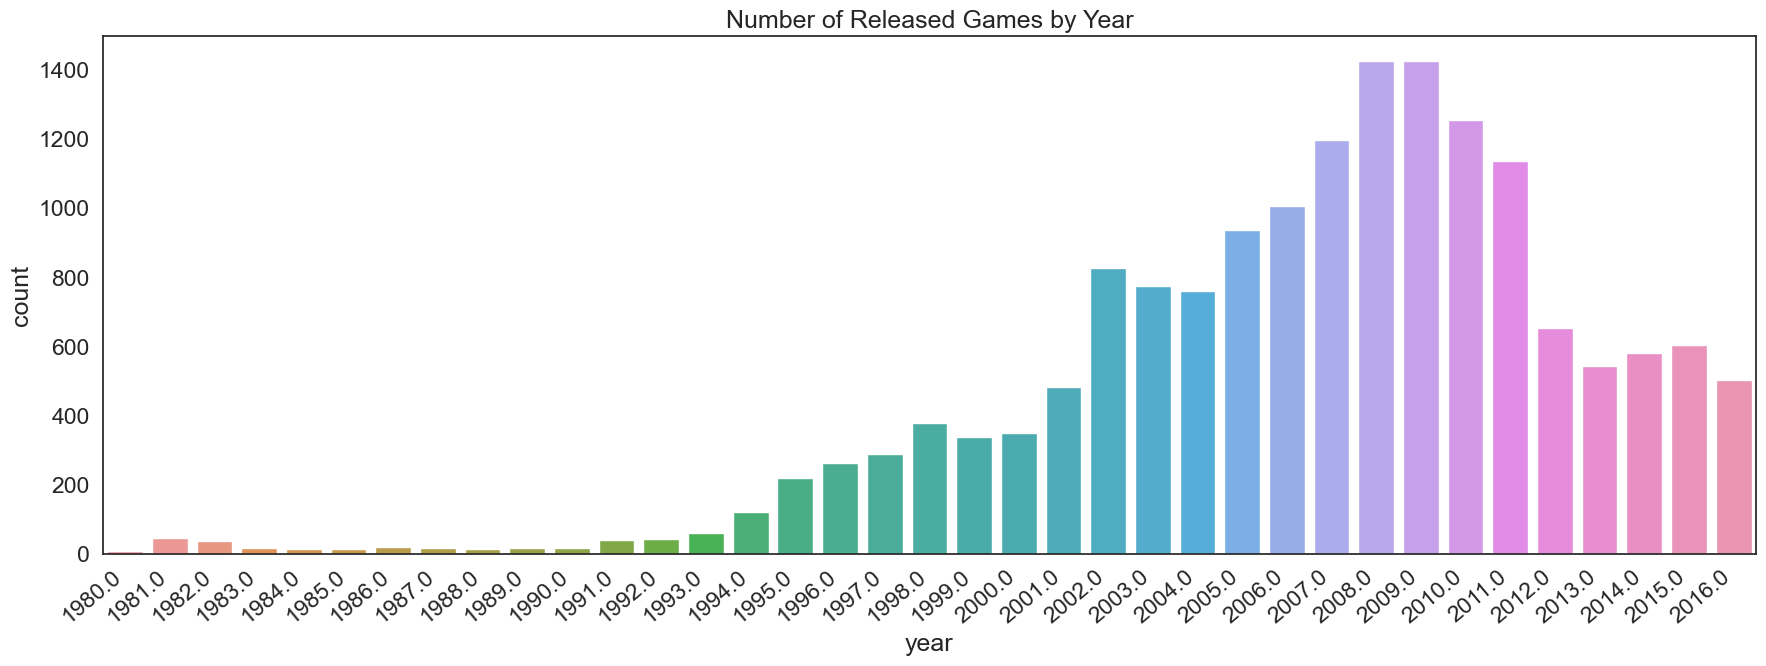

In [113]:
# create barplot

plt.figure(figsize=(18,7))

ax = sns.countplot(data=clean_df, x='year')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.set(font_scale=1.5)
ax.set(title='Number of Released Games by Year')

plt.tight_layout()
plt.show()

**Findings:**
* The number of released games over the years seems to change dramatically
* It tends to increase during three decades (1980-2010)
* The number of games released in 2008 was the greatest over the years
* After 2008, the trend started to downward and inert during the period from 2012 to 2016

**Insight:**
* The downward trends in game numbers from 2008 could be caused by several factors, such as the emergence of new platforms (smartphone, online pc, etc), the competition in the game industry/other industries (entertainment, etc), and others.
* After 2011, the number of released games tend to be stagnant

**Recommendation:**
* It seems that data from 2013 to 2016 are relevant to build the model for 2017. We need to confirm this by looking for the share sales by platform and genre
* We can conduct further investigation to evaluate factors behind the dramatic decline from 2011 - 2012 to prepare if this case might happen in the future

### Sales Distribution in Recent Years <a id='sales_dist'></a>

This section will try to answer these questions:
- How is the sales distribution in recent years?
- Are the differences in global sales significant?

In [114]:
# filter `clean_df` : 2014-2016

_3_last_year = clean_df.query('year>2013')
_3_last_year.sample(4)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
14626,MeiQ no Chika Ni Shisu: A Maze to Eradicate Th...,PSV,2015.0,Role-Playing,0.01,0.01,0.01,0.00,NaN,NaN,unknown,0.03
1726,Mad Max (2015),PS4,2015.0,Action,0.36,0.59,0.04,0.18,NaN,NaN,unknown,1.17
3925,WWE 2K16,PS3,2015.0,Sports,0.22,0.21,0.00,0.08,NaN,6.0,T,0.51
2626,Madden NFL 16,PS3,2015.0,Sports,0.57,0.06,0.00,0.14,NaN,3.1,E,0.77


In [115]:
# check the rows
len(_3_last_year)

1689

In [116]:
# describe `total_sales` in the last 3 years

_3_last_year.pivot_table(index='year',
                         values='total_sales',
                         aggfunc=['min', 'max', 'mean', 'median', np.var, np.std])

,min,max,mean,median,var,std
,total_sales,total_sales,total_sales,total_sales,total_sales,total_sales
year,,,,,,
2014.0,0.01,12.62,0.570620,0.16,1.519073,1.232507
2015.0,0.01,14.63,0.442211,0.09,1.208727,1.099421
2016.0,0.01,7.60,0.258845,0.06,0.487262,0.698041


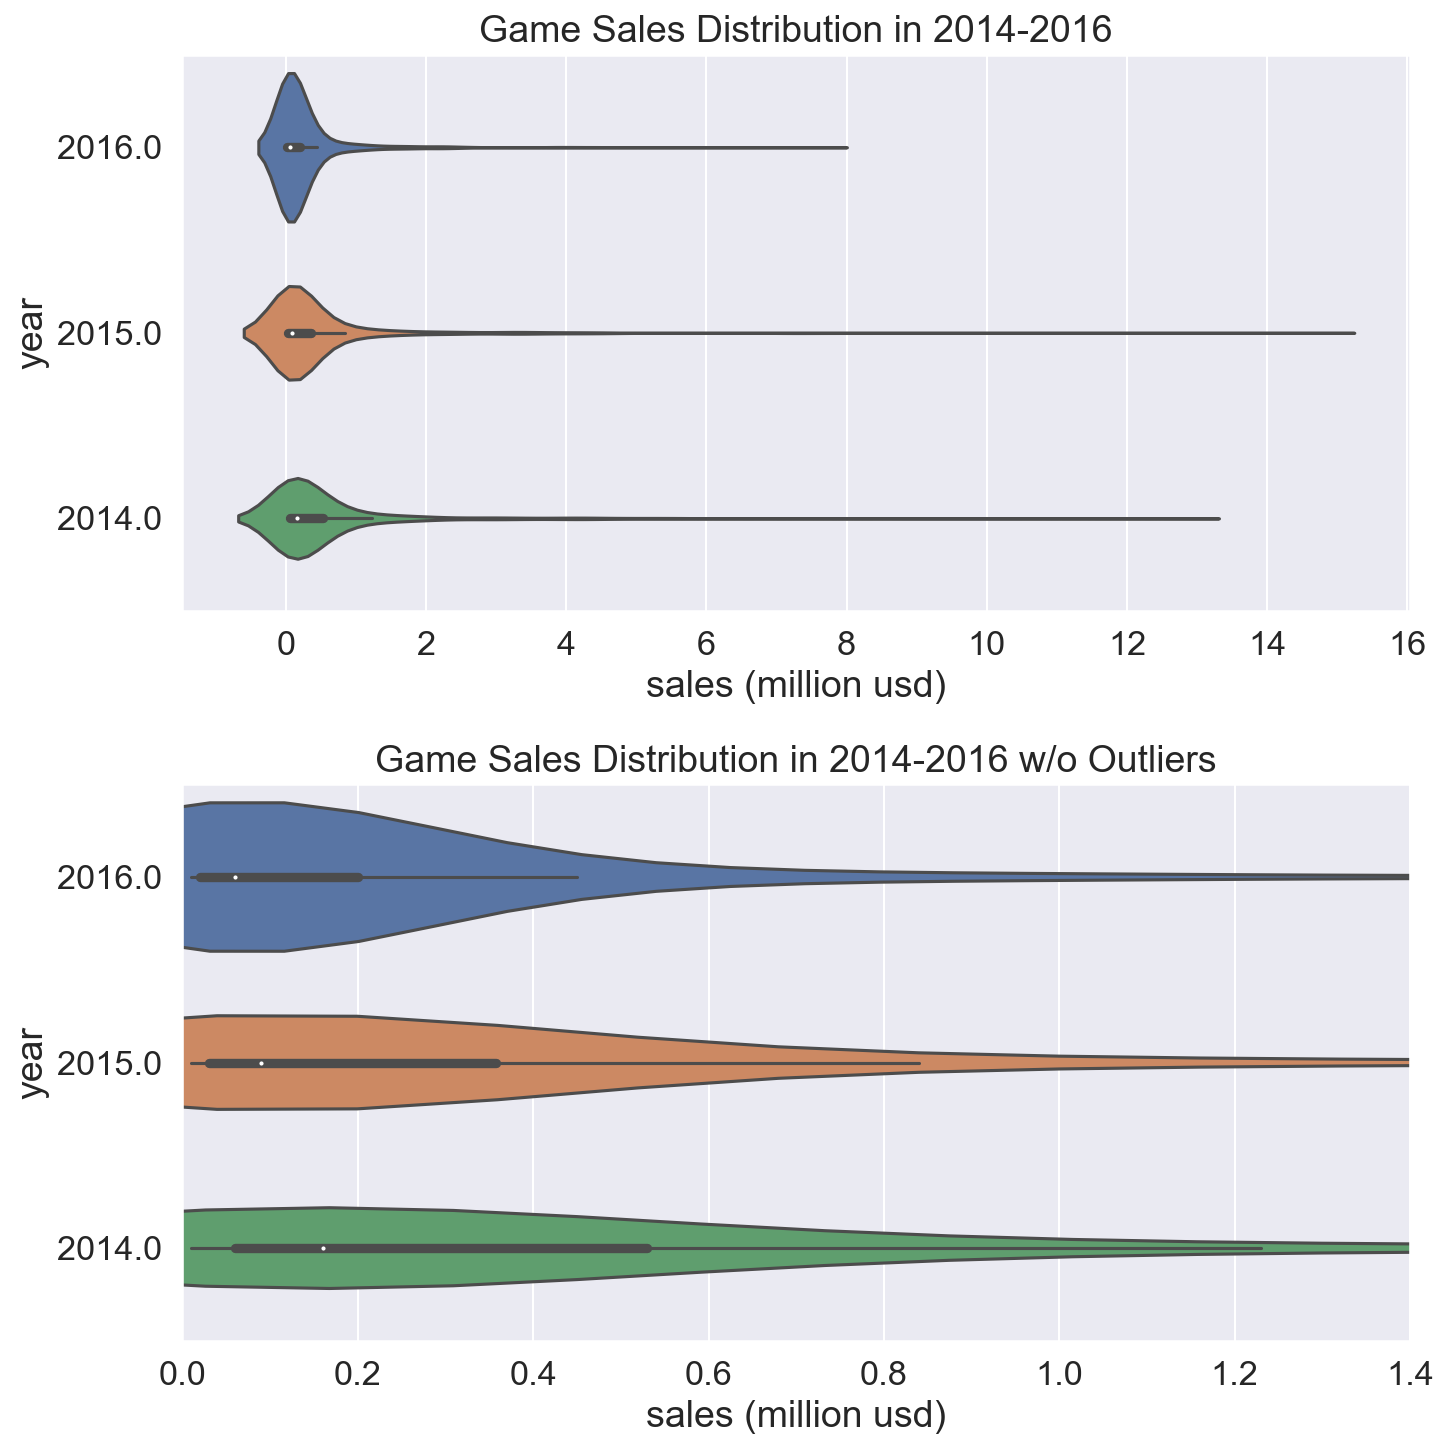

In [117]:
# display sales distribution 2014-2016

fig, axes = plt.subplots(2,1, figsize=(10,10), dpi=150)

(sns.violinplot(ax=axes[0],
                x=_3_last_year['total_sales'],
                y=_3_last_year['year'].astype('str'),
                order=[ "2016.0", "2015.0", "2014.0"])
    .set(title='Game Sales Distribution in 2014-2016',
         xlabel='sales (million usd)')
)

(sns.violinplot(ax=axes[1],
                x=_3_last_year['total_sales'],
                y=_3_last_year['year'].astype('str'),
                order=[ "2016.0", "2015.0", "2014.0"])
    .set(title='Game Sales Distribution in 2014-2016 w/o Outliers',
         xlabel='sales (million usd)', xlim=(0,1.4))
)

plt.tight_layout()
plt.show()

**From data description and violin chart**
**Findings**<br>
- The mean, median, variance, and std. deviation in `total_sales` decrease over the years
- The distribution of `total_sales` from games in the last 3 years is almost similar
- All distributions have positive skewed curve, since the presence of extreme outliers
- As time goes by, the  interquartile range (IQR) becomes more narrow and the median sales are getting lower

**Insights:**<br>
- Over the years, the gap `total_sales` among all games tends to lower
- Some games can achieve outstanding `total_sales`
- The global sales in 2014 and 2015 are slightly different, but global sales in 2016 seems different significantly
- Since 2016 is incompleted (ongoing), the data may change

### Platform and Sales <a id='platform_sales'></a>

In this section, we will see data from 2001 since we need to know platform lifespan.<br>

However, for the forecasting model in 2017, we will initially check platform sales shares to confirm whether using data from 2013-2016 is relevant.<br>

#### Platform Life-Span

This section will try to answer these questions:

- How long does it generally take for new platforms to appear and old ones to fade?
- Which platforms are leading in sales?
- Which ones are growing or shrinking? 
- What platforms used to be popular but now have zero sales?

To determine typical platform lifespan, we will use wilder year range (2001 - 2016)

In [118]:
# filter year in clean_df (2001-2016)

clean_year = clean_df.query('year>2000')
clean_year

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


In [119]:
# create function cross tabular data and create stackedbar of sales shares

def shares_stacked_bar (data, index, column, values, title, xlabel, ylabel):
    
    '''
    This function will create a cross-tabular table for creating a stacked bar plot.
    The bar will display the ratio of the shares
    
    data = data frame that will be used
    index = column that will be transformed as an x-axis
    column = the categorical values for hue in the stacked bar plot
    values = the numerical values for each categorical value in the column
    title = barplot title
    xlabel = label for the x-axis
    ylabel = label for the y-axis
    '''
    
    # create table
    temp_table = pd.crosstab(index=data[index],
                              columns=data[column],
                              values=data[values],
                              aggfunc='sum',
                              normalize='index')
    
    # create barplot
    temp_table.plot(kind='bar', stacked=True, 
                    colormap='tab20c', figsize=(10, 6))

    plt.title(title)
    plt.legend(loc=(1.03, 0), fontsize=13)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

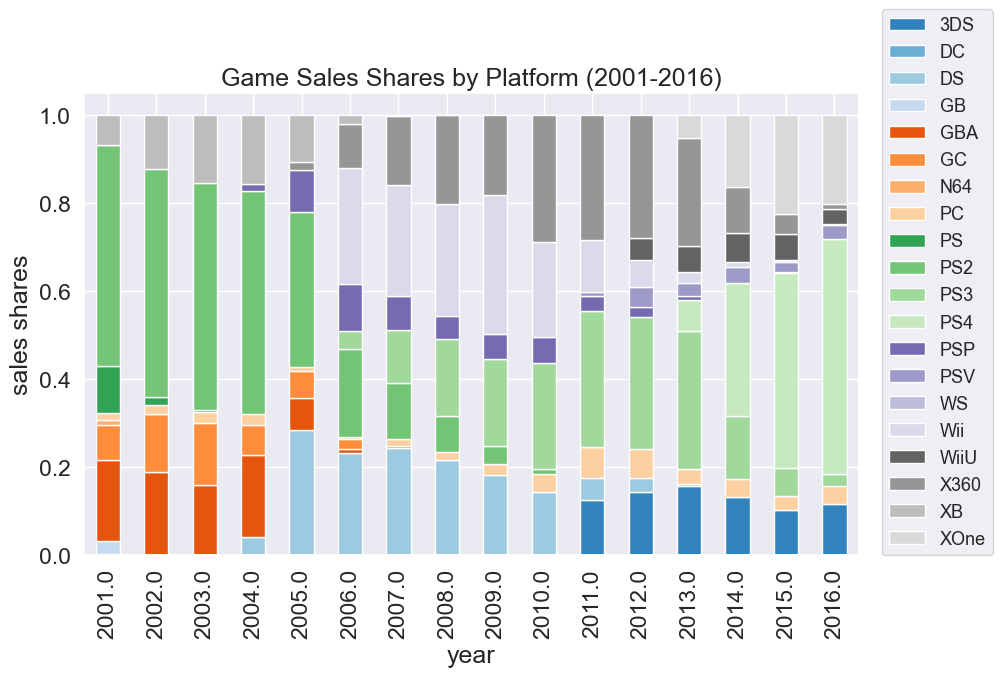

In [120]:
# display sales shares by platform in stacked bar

shares_stacked_bar(data=clean_year,
                   index='year',
                   column='platform',
                   values='total_sales',
                   title='Game Sales Shares by Platform (2001-2016)',
                   xlabel='year',
                   ylabel='sales shares'
                  )

**Findings:**<br>
- The lifespan of the top market leader platforms (to be the top 4):
| Platform | Lifespan (years) |
|----------|------------------|
| PS2 | 6 |
| PS3 | 8 |
| PS4 | 3 (ongoing) |
| XB | 4 |
| X360 | 7 |
| XOne | 3 (ongoing) |
| Wii | 6 |
| DS | 6 |
| 3DS | 6 |
| GBA | 4 |The lifespan of the top market leader platform (to be top 4):

- It seems that the platform lifespan is around 5-6 years
- The market shares leaders in the last decade come from the PS series, Xbox series, and DS series
- In 2015-2016, the sales shares by platform leaders seem to have a similar proportion
- Several platforms disappeared in recent years: `DC`, `DS`, `GB`, `GBA`, `GC`, `N64`, `PS`, `PS2`, `PSP`, `WS`, `Wii`, and `XB` 
- Emerging platforms in recent years: `PS4`and `XOne`, 

**Insight**<br>
- Platform is relevant for 5-6 years, then the market will prefer the new one
- The market shares by platform tend to be concentrated into one big player, which is the PS series
- Followed by second and third best (Xbox series and DS series)
- Period 2015-2016 seems more relevant to be used to forecast the potential big-winner platforms in 2017

**Recommendation:**<br>
- Use data from 2015-2016 to build model sales by `platform` in 2017
- Consider the platform lifespan to estimate `total_sales` in the future
- Keep our eye on the top 3 market leaders (`PS4`, `XOne`, and `3DS`) while monitoring any emerging platform that can be a new gainer market share in future

#### Potential Big-Winner Platform

##### **Sales on Various Platforms**

This section will identify how sales vary from platform to platform, platform that gained the greatest total sale, and the average sales on various platforms, and platforms that will be potentially profitable

In [121]:
# filter year in `clean_df` (2015-2016)

_2_last_year = clean_df.query('year>2014')
_2_last_year.sample(4)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
6355,LEGO Marvel's Avengers,PS3,2016.0,Action,0.10,0.12,0.00,0.04,NaN,5.5,E10+,0.26
2759,Final Fantasy X/X-2 HD Remaster,PS4,2015.0,Role-Playing,0.29,0.27,0.06,0.11,NaN,NaN,unknown,0.73
8009,Just Dance 2017,Wii,2016.0,Misc,0.06,0.11,0.00,0.01,NaN,NaN,E10+,0.18
5320,Mirror's Edge Catalyst,PS4,2016.0,Platform,0.11,0.16,0.02,0.05,69.0,4.7,T,0.34


In [122]:
# check the rows
len(_3_last_year)

1689

In [123]:
# check average sales from various platform

sales_platform_last_year = (_2_last_year.groupby(['platform', 'year'])['total_sales']
                                        .agg(['sum','count'])
                                        .reset_index()
                                        .sort_values(by='year')
                                        .reset_index(drop=True)
                           )
sales_platform_last_year

,platform,year,sum,count
0,3DS,2015.0,27.78,86
1,X360,2015.0,11.96,35
2,WiiU,2015.0,16.35,28
3,Wii,2015.0,1.14,4
4,XOne,2015.0,60.14,80
5,PSP,2015.0,0.12,3
6,PSV,2015.0,6.25,110
7,PS3,2015.0,16.82,73
8,PC,2015.0,8.52,50
9,PS4,2015.0,118.90,137


In [124]:
# create color palette for platform

col_category = ['3DS', 'X360', 'WiiU', 'Wii', 'XOne', 'PSP', 'PSV', 'PS3', 'PC', 'PS4']
color_palette = sns.color_palette("Paired",len(col_category))
mapped_color_palette = dict(zip(col_category, color_palette)) 

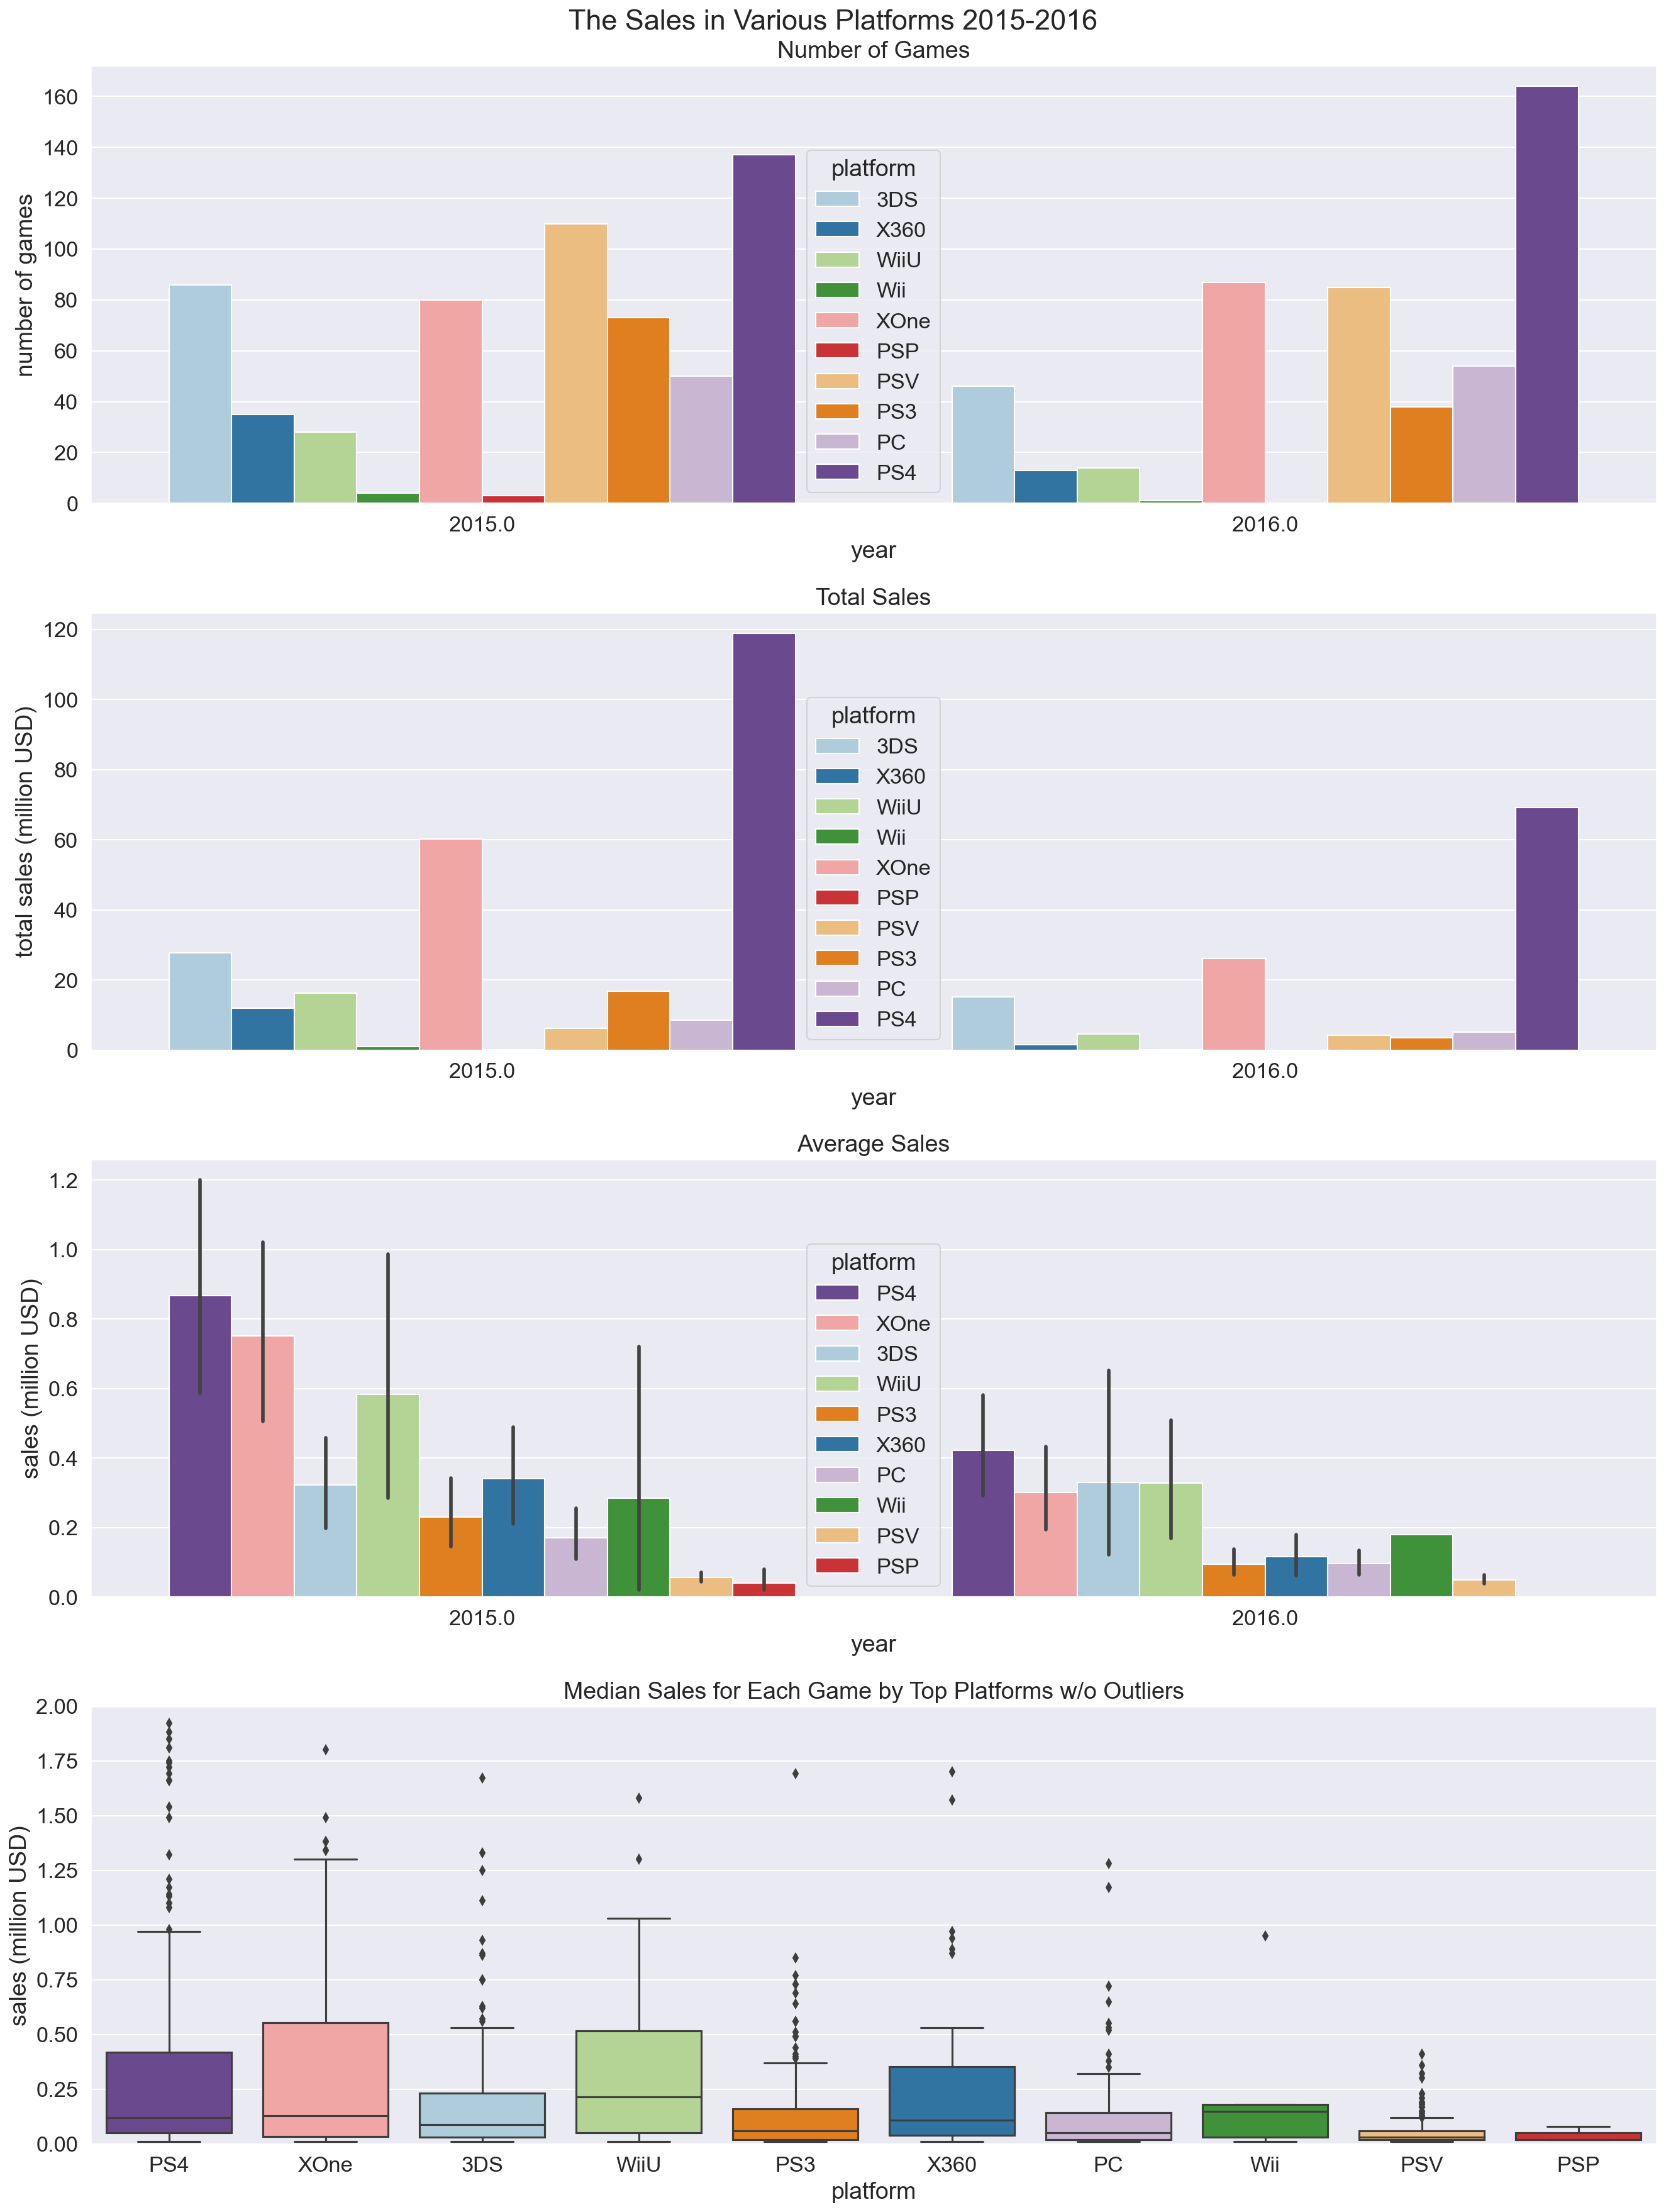

In [125]:
figure, axes = plt.subplots(4,1, figsize=(18,24), dpi=150)
figure.suptitle('The Sales in Various Platforms 2015-2016')

# number of games
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[0],
             data=sales_platform_last_year,
             x='year',
             y='count',
             hue='platform',
             palette=mapped_color_palette)
    .set(title='Number of Games', ylabel='number of games')
)

# total sales by platform
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[1],
             data=sales_platform_last_year,
             x='year',
             y='sum',
             hue='platform',
             palette=mapped_color_palette)
    .set(title='Total Sales', ylabel='total sales (million USD)')
)

# Average sales by platform
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[2],
             data=_2_last_year,
             x='year',
             y='total_sales',
             hue='platform',
             palette=mapped_color_palette)
    .set(title='Average Sales', ylabel='sales (million USD)')
)

# Median Sales for each game by Top Platforms w/o Outliers
#---------------------------------------------------------------------------------------------------------------------

(sns.boxplot(ax=axes[3], data=_2_last_year, y='total_sales', x='platform', palette=mapped_color_palette)
    .set(title='Median Sales for Each Game by Top Platforms w/o Outliers', ylabel='sales (million USD)', ylim=(0,2))
)


plt.tight_layout()
plt.show()

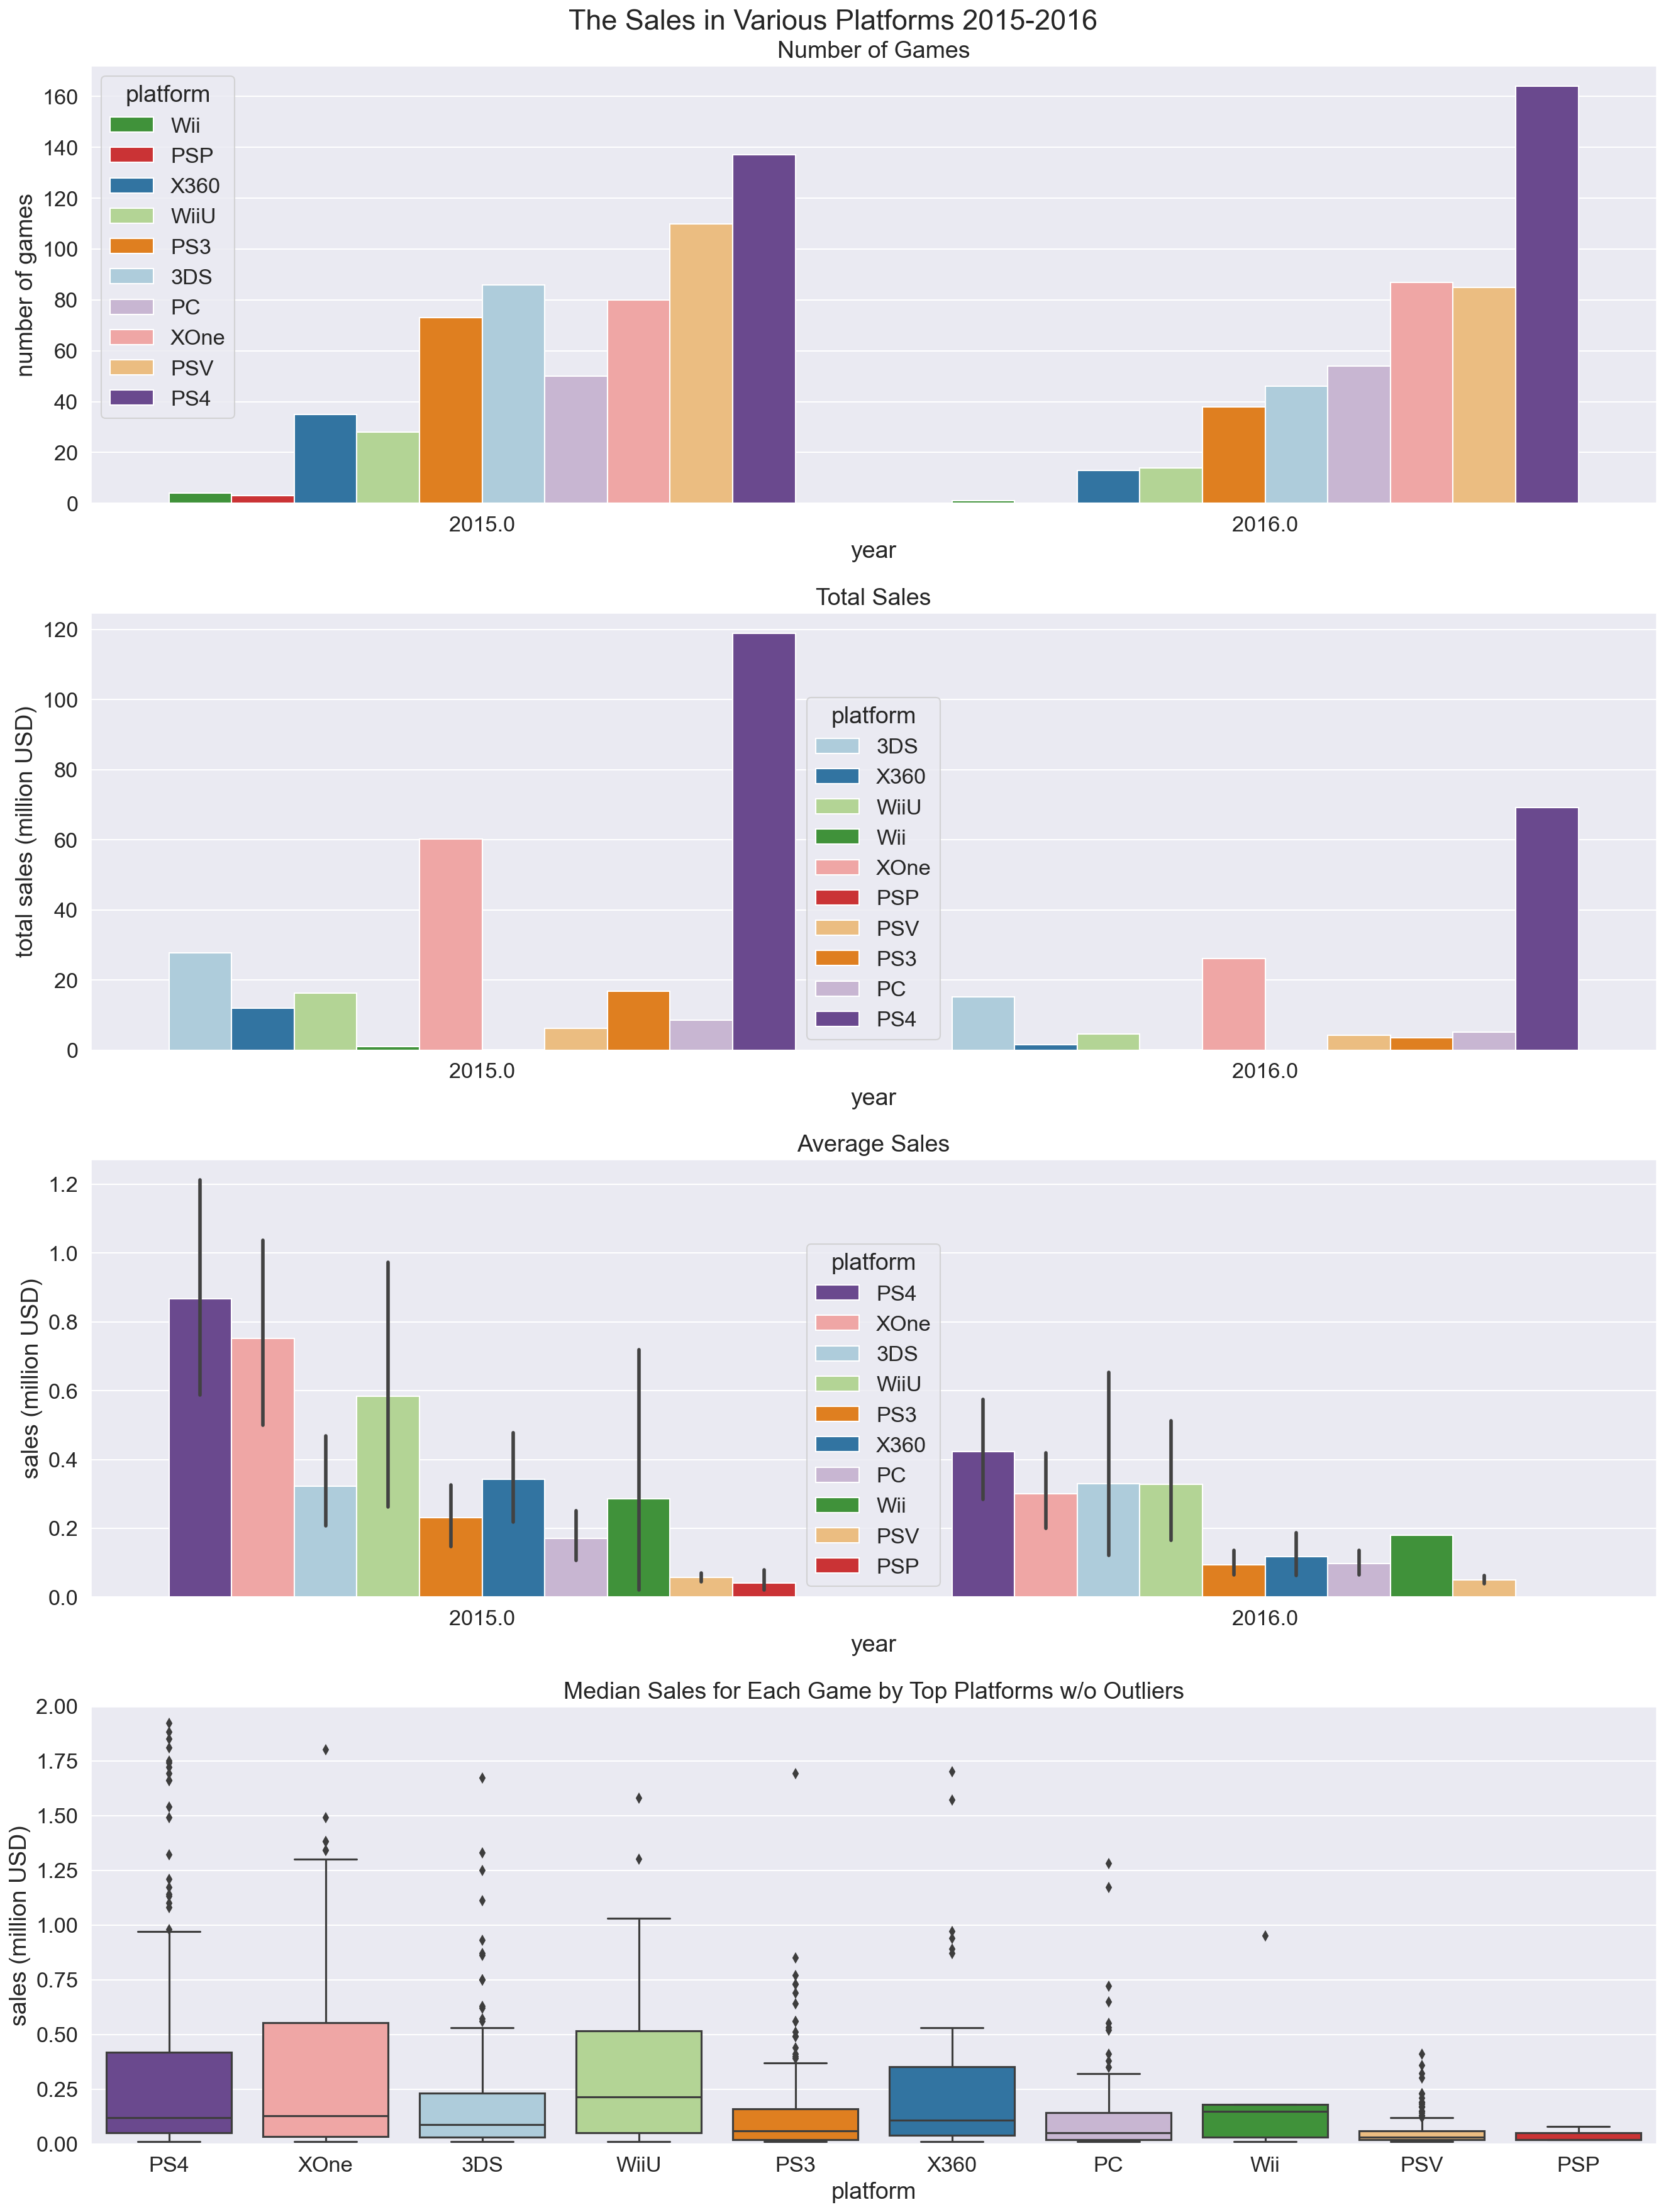

In [126]:
figure, axes = plt.subplots(4,1, figsize=(18,24), dpi=150)
figure.suptitle('The Sales in Various Platforms 2015-2016')

# number of games
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[0],
             data=sales_platform_last_year.sort_values('count'),
             x='year',
             y='count',
             hue='platform',
             palette=mapped_color_palette)
    .set(title='Number of Games', ylabel='number of games')
)

# total sales by platform
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[1],
             data=sales_platform_last_year,
             x='year',
             y='sum',
             hue='platform',
             palette=mapped_color_palette)
    .set(title='Total Sales', ylabel='total sales (million USD)')
)

# Average sales by platform
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[2],
             data=_2_last_year,
             x='year',
             y='total_sales',
             hue='platform',
             palette=mapped_color_palette)
    .set(title='Average Sales', ylabel='sales (million USD)')
)

# Median Sales for each game by Top Platforms w/o Outliers
#---------------------------------------------------------------------------------------------------------------------

(sns.boxplot(ax=axes[3], data=_2_last_year, y='total_sales', x='platform', palette=mapped_color_palette)
    .set(title='Median Sales for Each Game by Top Platforms w/o Outliers', ylabel='sales (million USD)', ylim=(0,2))
)


plt.tight_layout()
plt.show()

**Findings:**<br>
- The higher number of games doesn't always in line with the higher total sales
- For example, the `3DS` and `PSV` has lots amount games but gain lower total sales
- The number of games in `PS4` 2016 increased, however the total sales were below the previous year
- This may happen due to the data in 2016 is incomplete (ongoing)
- The average game sale from all platforms were marked up by outliers
- The median game sale in the top 3 platforms (`PS4`, `XOne`, `3DS`) are almost similar but have different IQR

**Insight**<br>
- The `PS4` gained the highest total sales in 2015-2016. Having more than 50% shares made the PS4 dominated the game platforms, followed by two platforms (`XOne`, `3DS`) and others
- Those pattern seems to be happen in 2017, although the proportion may change

##### **Total Sales Distribution on Top Platform**

This section will check the trend of total sales from the PS series, as the market leader game platform, to get the trend of total sales during the platform lifespan. The trend can be used to forecast the potential sales by considering platform age in the next year.

In [127]:
# filter the period of PS2, PS3, PS4

ps = ['PS2', 'PS3', 'PS4']

ps_sales = clean_df.query('platform in @ps and year>1999')
ps_sales.head(4)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97


In [128]:
# check the rows

len(ps_sales)

3825

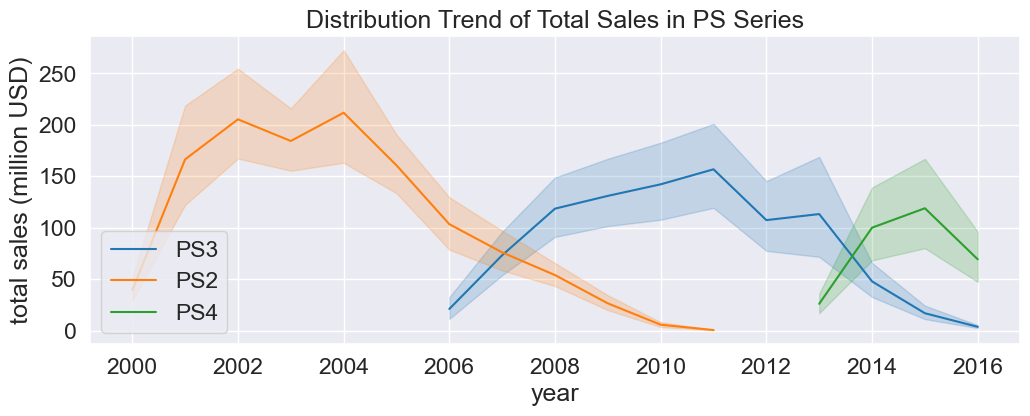

In [129]:
# create distribution chart

plt.figure(figsize=(12,4))

(sns.lineplot(data=ps_sales,
              x='year', y='total_sales', estimator='sum',
              hue='platform',
              palette='tab10')
    .set(title='Distribution Trend of Total Sales in PS Series', ylabel='total sales (million USD)')
)

plt.legend(loc='lower left')
plt.show()

**Findings:**<br>
- The trend from all PS series seems to be similar
- The trend represents the product life cycle
- Despite having a different peak in total sales, both `PS2` and `PS3` have a lifespan of around 10 years
- In `PS4`, the total sales seem to decrease after 2015
- The data in 2016 is incomplete (ongoing), since it may change

**Insight**<br>
- Based on the previous trends, `PS4` has a possibility to gain more total sales in 2016 and 2017

##### Top Platforms in Each Region

This section will identify the market leader by the platform in each region, that is North America, Europe, Japan, other countries, and global in 2015-2016. Thus, we can suggest the potential top 5 platforms in each region on 2017.

In [130]:
# create function to sort top five parameter by region

def top5_region (data, region, parameter):
    top5 = (data.groupby(parameter)[region]
                .sum()
                .sort_values(ascending=False)
                .reset_index()
           )
    
    top5_a = top5[:5]
    top5_b = (top5.drop(top5.head(5).index))
    
    top5_b.loc[:,parameter] = 'others'
    top5_b = top5_b.groupby(parameter)[region].sum().reset_index()
    
    top5_all = pd.concat([top5_a, top5_b]).set_index(parameter)
    
    return top5_all

In [131]:
# create function : cross tabular data to create stacked bar

def cross_tab_sum (data, index, column, values):
    temp_table = pd.crosstab(index=data[index],
                              columns=data[column],
                              values=data[values],
                              aggfunc='sum',
                              normalize='index')
    return temp_table

In [132]:
# apply fuction in North America's sales

na_sales = cross_tab_sum(_2_last_year, 'year', 'platform', 'na_sales')
na_sales

platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year,,,,,,,,,,
2015.0,0.057739,0.022085,0.046697,0.3965,0.0,0.003650,0.004024,0.063260,0.068875,0.337170
2016.0,0.092143,0.030269,0.014912,0.4783,0.0,0.003339,0.001335,0.046739,0.015357,0.317605


In [133]:
# apply fuction in other regions' sales
# Europe
eu_sales = cross_tab_sum(_2_last_year, 'year', 'platform', 'eu_sales')

# Japan
jp_sales = cross_tab_sum(_2_last_year, 'year', 'platform', 'jp_sales')

# Other countries
other_sales = cross_tab_sum(_2_last_year, 'year', 'platform', 'other_sales')

# Global
total_sales = cross_tab_sum(_2_last_year, 'year', 'platform', 'total_sales')

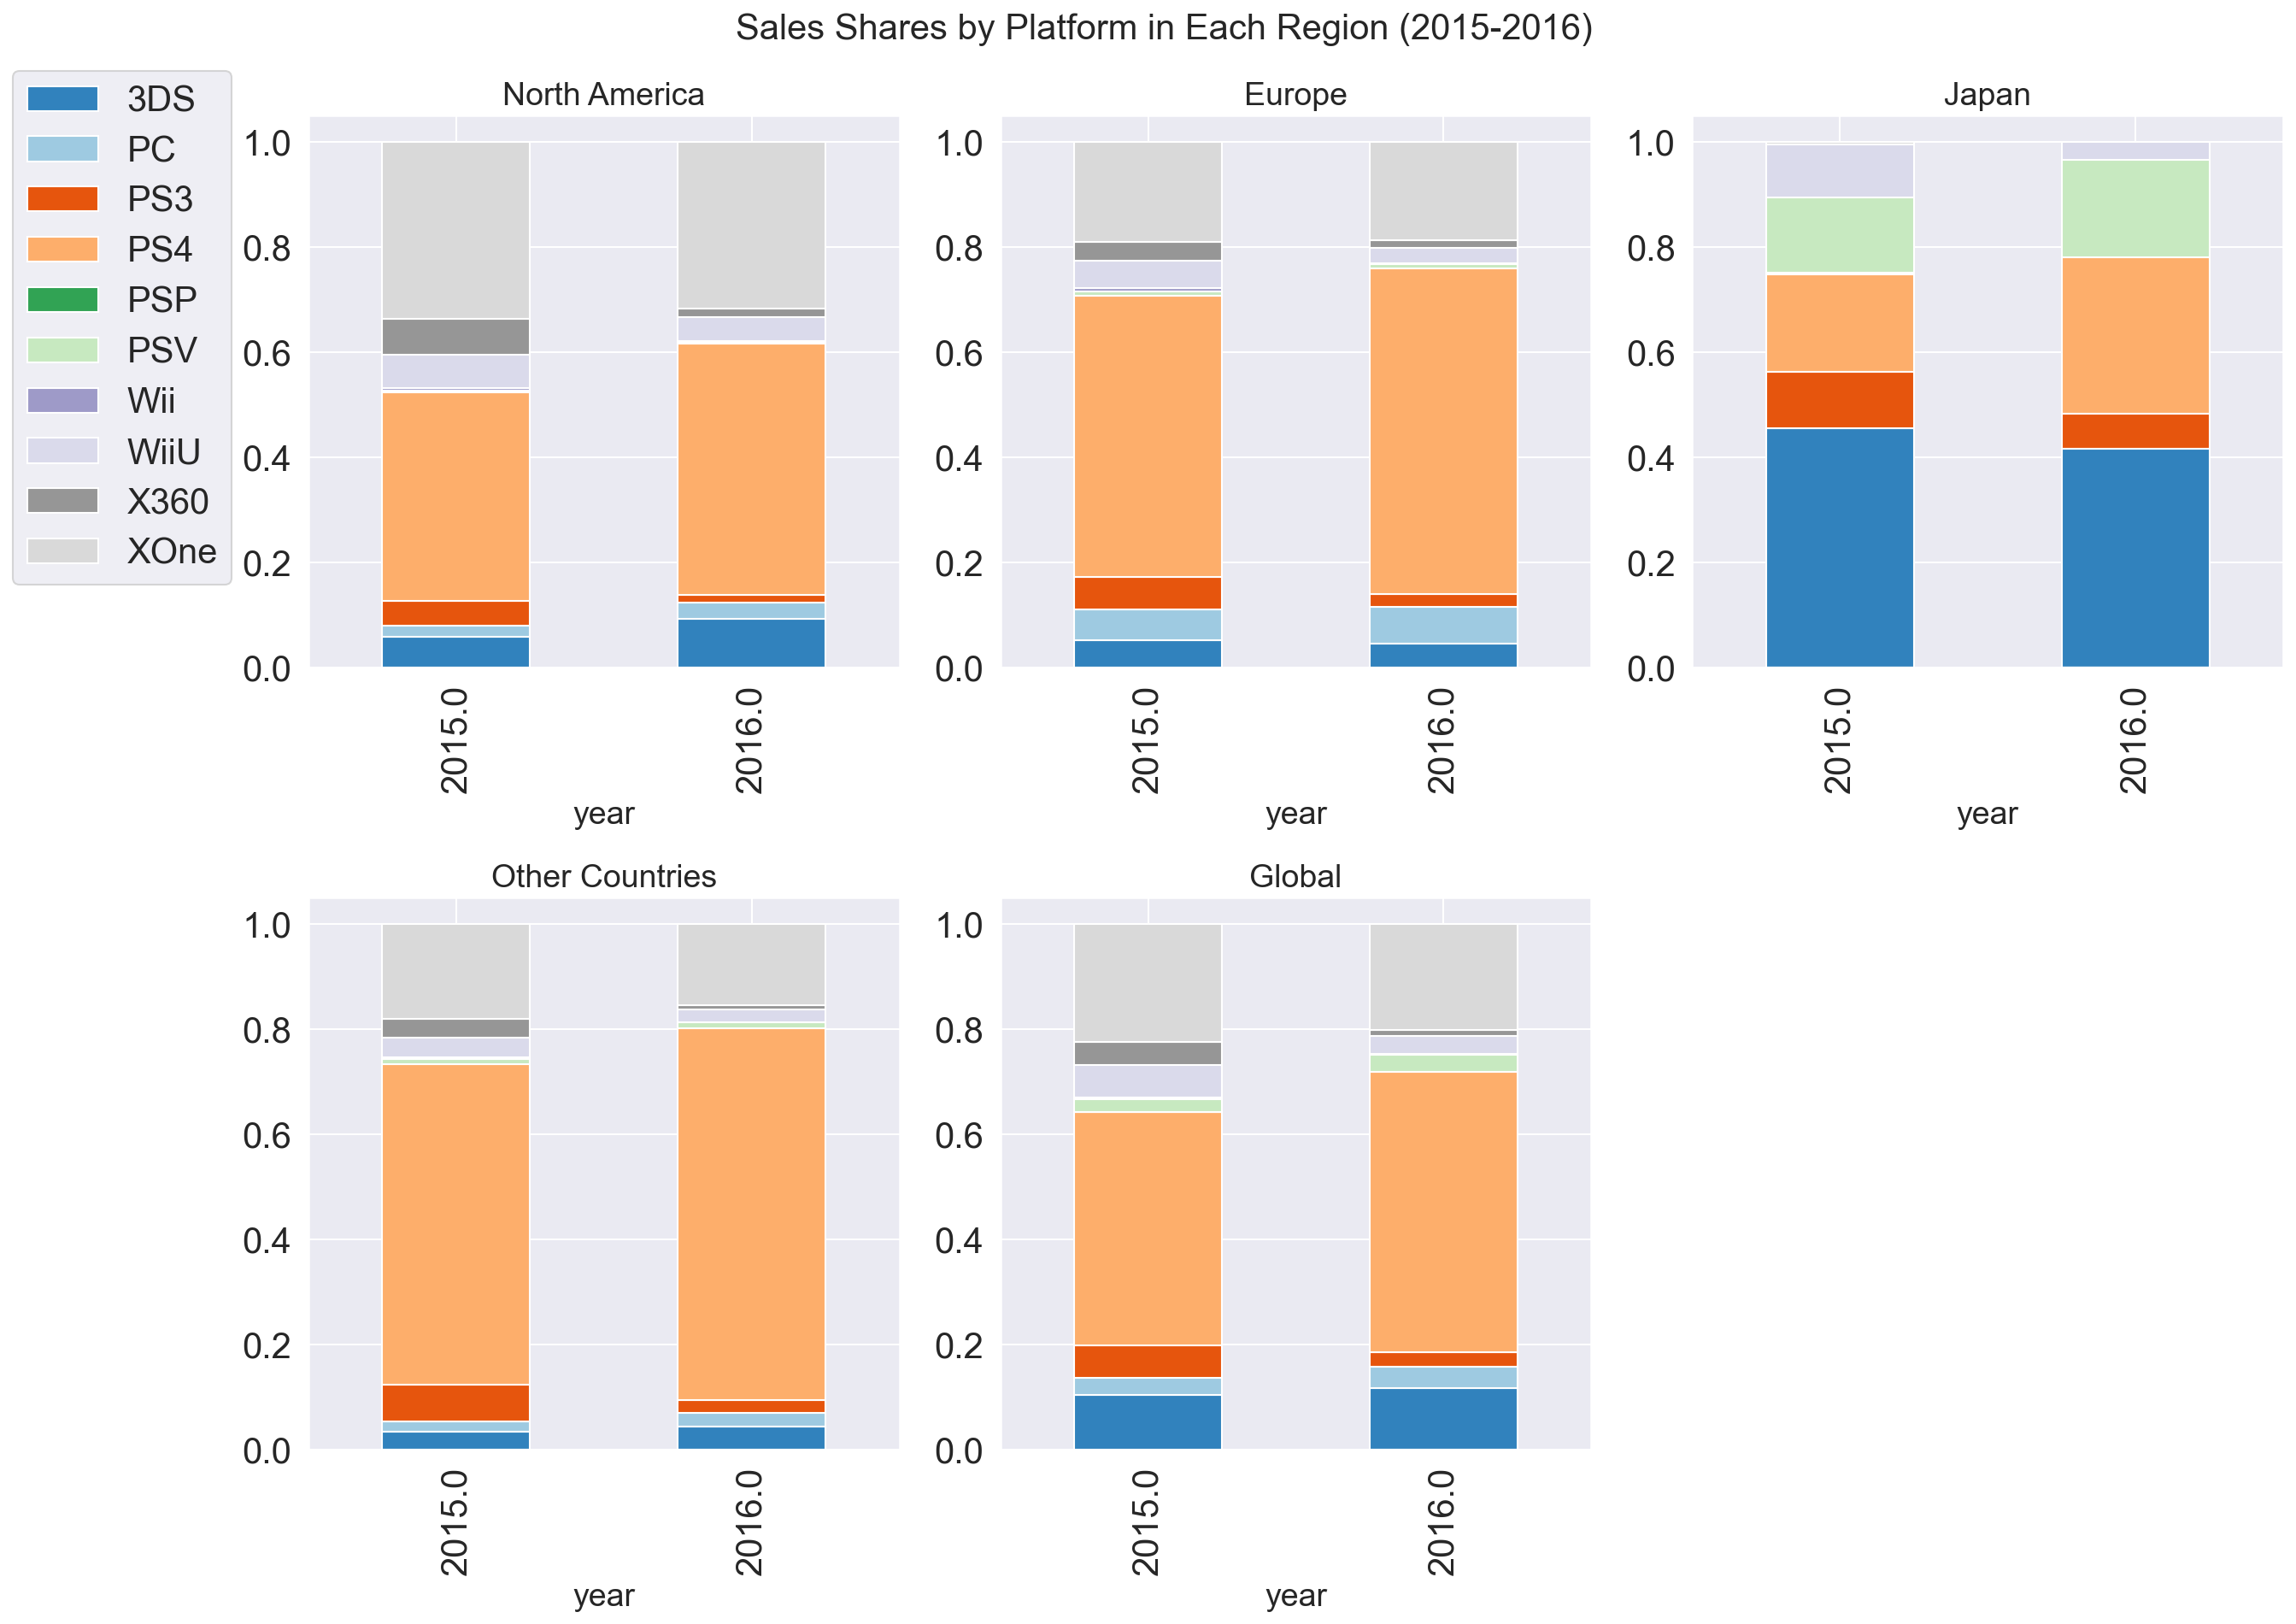

In [134]:
# display the sales shares by platform in stacked bar
# compare the shares in each region

fig, axes = plt.subplots(2,3, figsize=(18,13), dpi=150)
plt.suptitle('Sales Shares by Platform in Each Region (2015-2016)', fontsize=20)

na_sales.plot(ax=axes[0,0], kind='bar', stacked=True, colormap='tab20c', title='North America', fontsize=20).legend(loc=(-0.5, 0.15), fontsize='20')
eu_sales.plot(ax=axes[0,1], kind='bar', stacked=True, colormap='tab20c', title='Europe', fontsize=20, legend=False)
jp_sales.plot(ax=axes[0,2], kind='bar', stacked=True, colormap='tab20c', title='Japan', fontsize=20, legend=False)
other_sales.plot(ax=axes[1,0], kind='bar', stacked=True, colormap='tab20c', title='Other Countries', fontsize=20, legend=False)
total_sales.plot(ax=axes[1,1], kind='bar', stacked=True, colormap='tab20c', title='Global', fontsize=20, legend=False)

# remove extra subplot
fig.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

In [135]:
# Display top 5 platform by each region
# loop and assign function 'top5_region'

region_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']

for sales in region_sales:
    print(top5_region (_2_last_year, sales, 'platform'))
    print('---------------------------------------')

          na_sales
platform          
PS4          63.86
XOne         50.30
3DS          10.31
WiiU          8.86
X360          8.05
others       10.41
---------------------------------------
          eu_sales
platform          
PS4          83.54
XOne         28.10
PC            9.10
3DS           7.39
PS3           7.30
others       12.51
---------------------------------------
          jp_sales
platform          
3DS          23.55
PS4          12.05
PSV           8.41
PS3           4.97
WiiU          4.12
others        0.30
---------------------------------------
          other_sales
platform             
PS4             28.70
XOne             7.71
PS3              2.49
3DS              1.67
WiiU             1.48
others           2.74
---------------------------------------
          total_sales
platform             
PS4            188.15
XOne            86.29
3DS             42.92
WiiU            20.95
PS3             20.42
others          39.19
--------------------------------

**Findings:**<br>
* All regions seem to have similar top platform sales leaders unless `Japan`
* The top platform sales in all regions were `PS4`, followed by `XOne`, `3DS`, `PS3`, and `WiiU` in different ratio
* In Japan, the top platform sales were `3DS`, followed by `PS4`, `PSV`, `PS3`, and `WiiU`
* In the last 3 years, the sales shares by the platform are almost similar, in another word the changes are slightly

**Insight:**<br>

* The top market shares by the platform in all regions are almost the same
* Japan has unique market shares among the regions

### Genre and Sales <a id='genre'></a>

This section will look for the most profitable genres based on the total sales and marked several genres that most likely gain high and low sales.

#### Sales Shares by Genres

The genre trend will be identified by looking at historical data in the last 3 years(2014-2016). We will find the most profitable genres and the general summary of sales by genre.

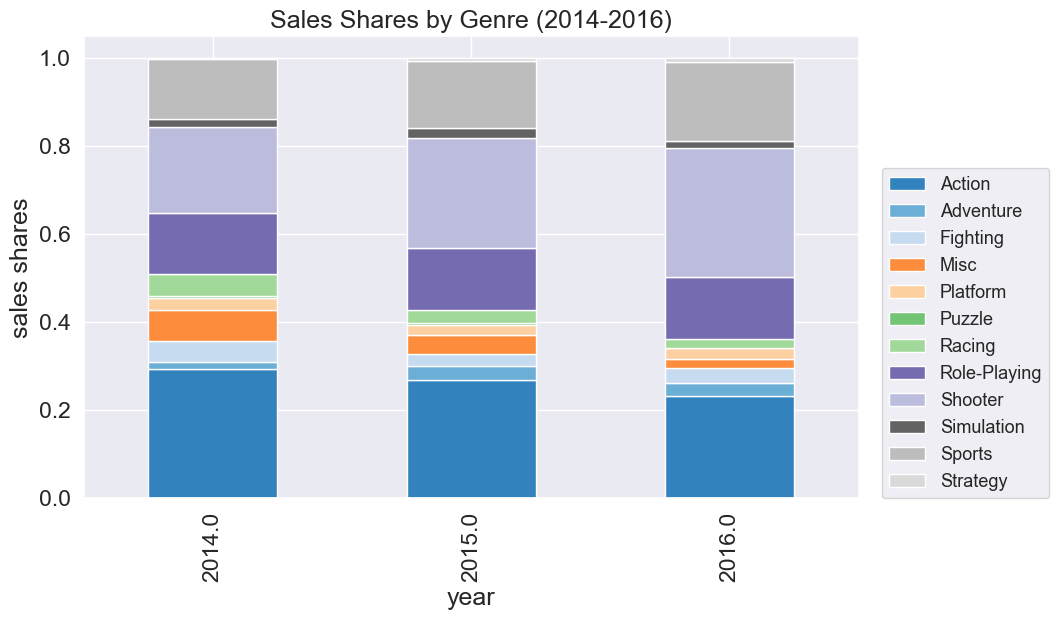

In [136]:
# display sales shares by genre in stacked bar
# apply function 'shares_stacked_bar()'

shares_stacked_bar(data=_3_last_year,
                   index='year',
                   column='genre',
                   values='total_sales',
                   title='Sales Shares by Genre (2014-2016)',
                   xlabel='year',
                   ylabel='sales shares'
                  )

**Findings:**<br>
- The sales shares by genre seem to have slight changes during 2014-2016
- Several genres tend to gain market shares (`Shooter`, `Sport`)
- Several genres tend to decrease their' market shares (`Action`, `Racing`, `Misc`)
- The others tend to be fluctuating but quite stable (`Adventure`, `Fighting`, `Role-Playing`, `Simulation`, `Sports`)
- The `Puzzle` genre has minuscule market share, at glance, It doesn't exist in recent years

**Insight**<br>
- Period 2014-2016 seems relevant to use for forecasting the potential big-winner genre in 2017
- Overall, the changes in market sales shares are slightly

**Recommendation:**<br>
- We should concern about genres that have the upward and the downward trends to maximaze the sales

#### Potential Big-Winner Genre

In the last year, `Shooter`, `Action`, `Sports` and `Role-Playing` genres seem to dominate the market sales.

However, we should look closely at the significant difference in the total sales from these various genres by comparing the average sale and total sales in 2014-2016.<br>

In [137]:
# check average sales from various genres

sales_genre_last_year = (_3_last_year.groupby(['genre', 'year'])['total_sales']
                                     .agg(['sum','count'])
                                     .reset_index()
                                     .sort_values(by='year')
                                     .reset_index(drop=True)
                           )

sales_genre_last_year.head(4)

,genre,year,sum,count
0,Action,2014.0,97.23,188
1,Simulation,2014.0,5.58,11
2,Role-Playing,2014.0,45.62,89
3,Racing,2014.0,16.66,27


In [138]:
# check the rows
len(sales_genre_last_year)

36

In [139]:
# create color palette for genre

col_genre = ['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
             'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure',
             'Puzzle', 'Strategy']

color_palette_genre = sns.color_palette("Paired",len(col_genre))
mapped_color_palette_genre = dict(zip(col_genre, color_palette_genre)) 

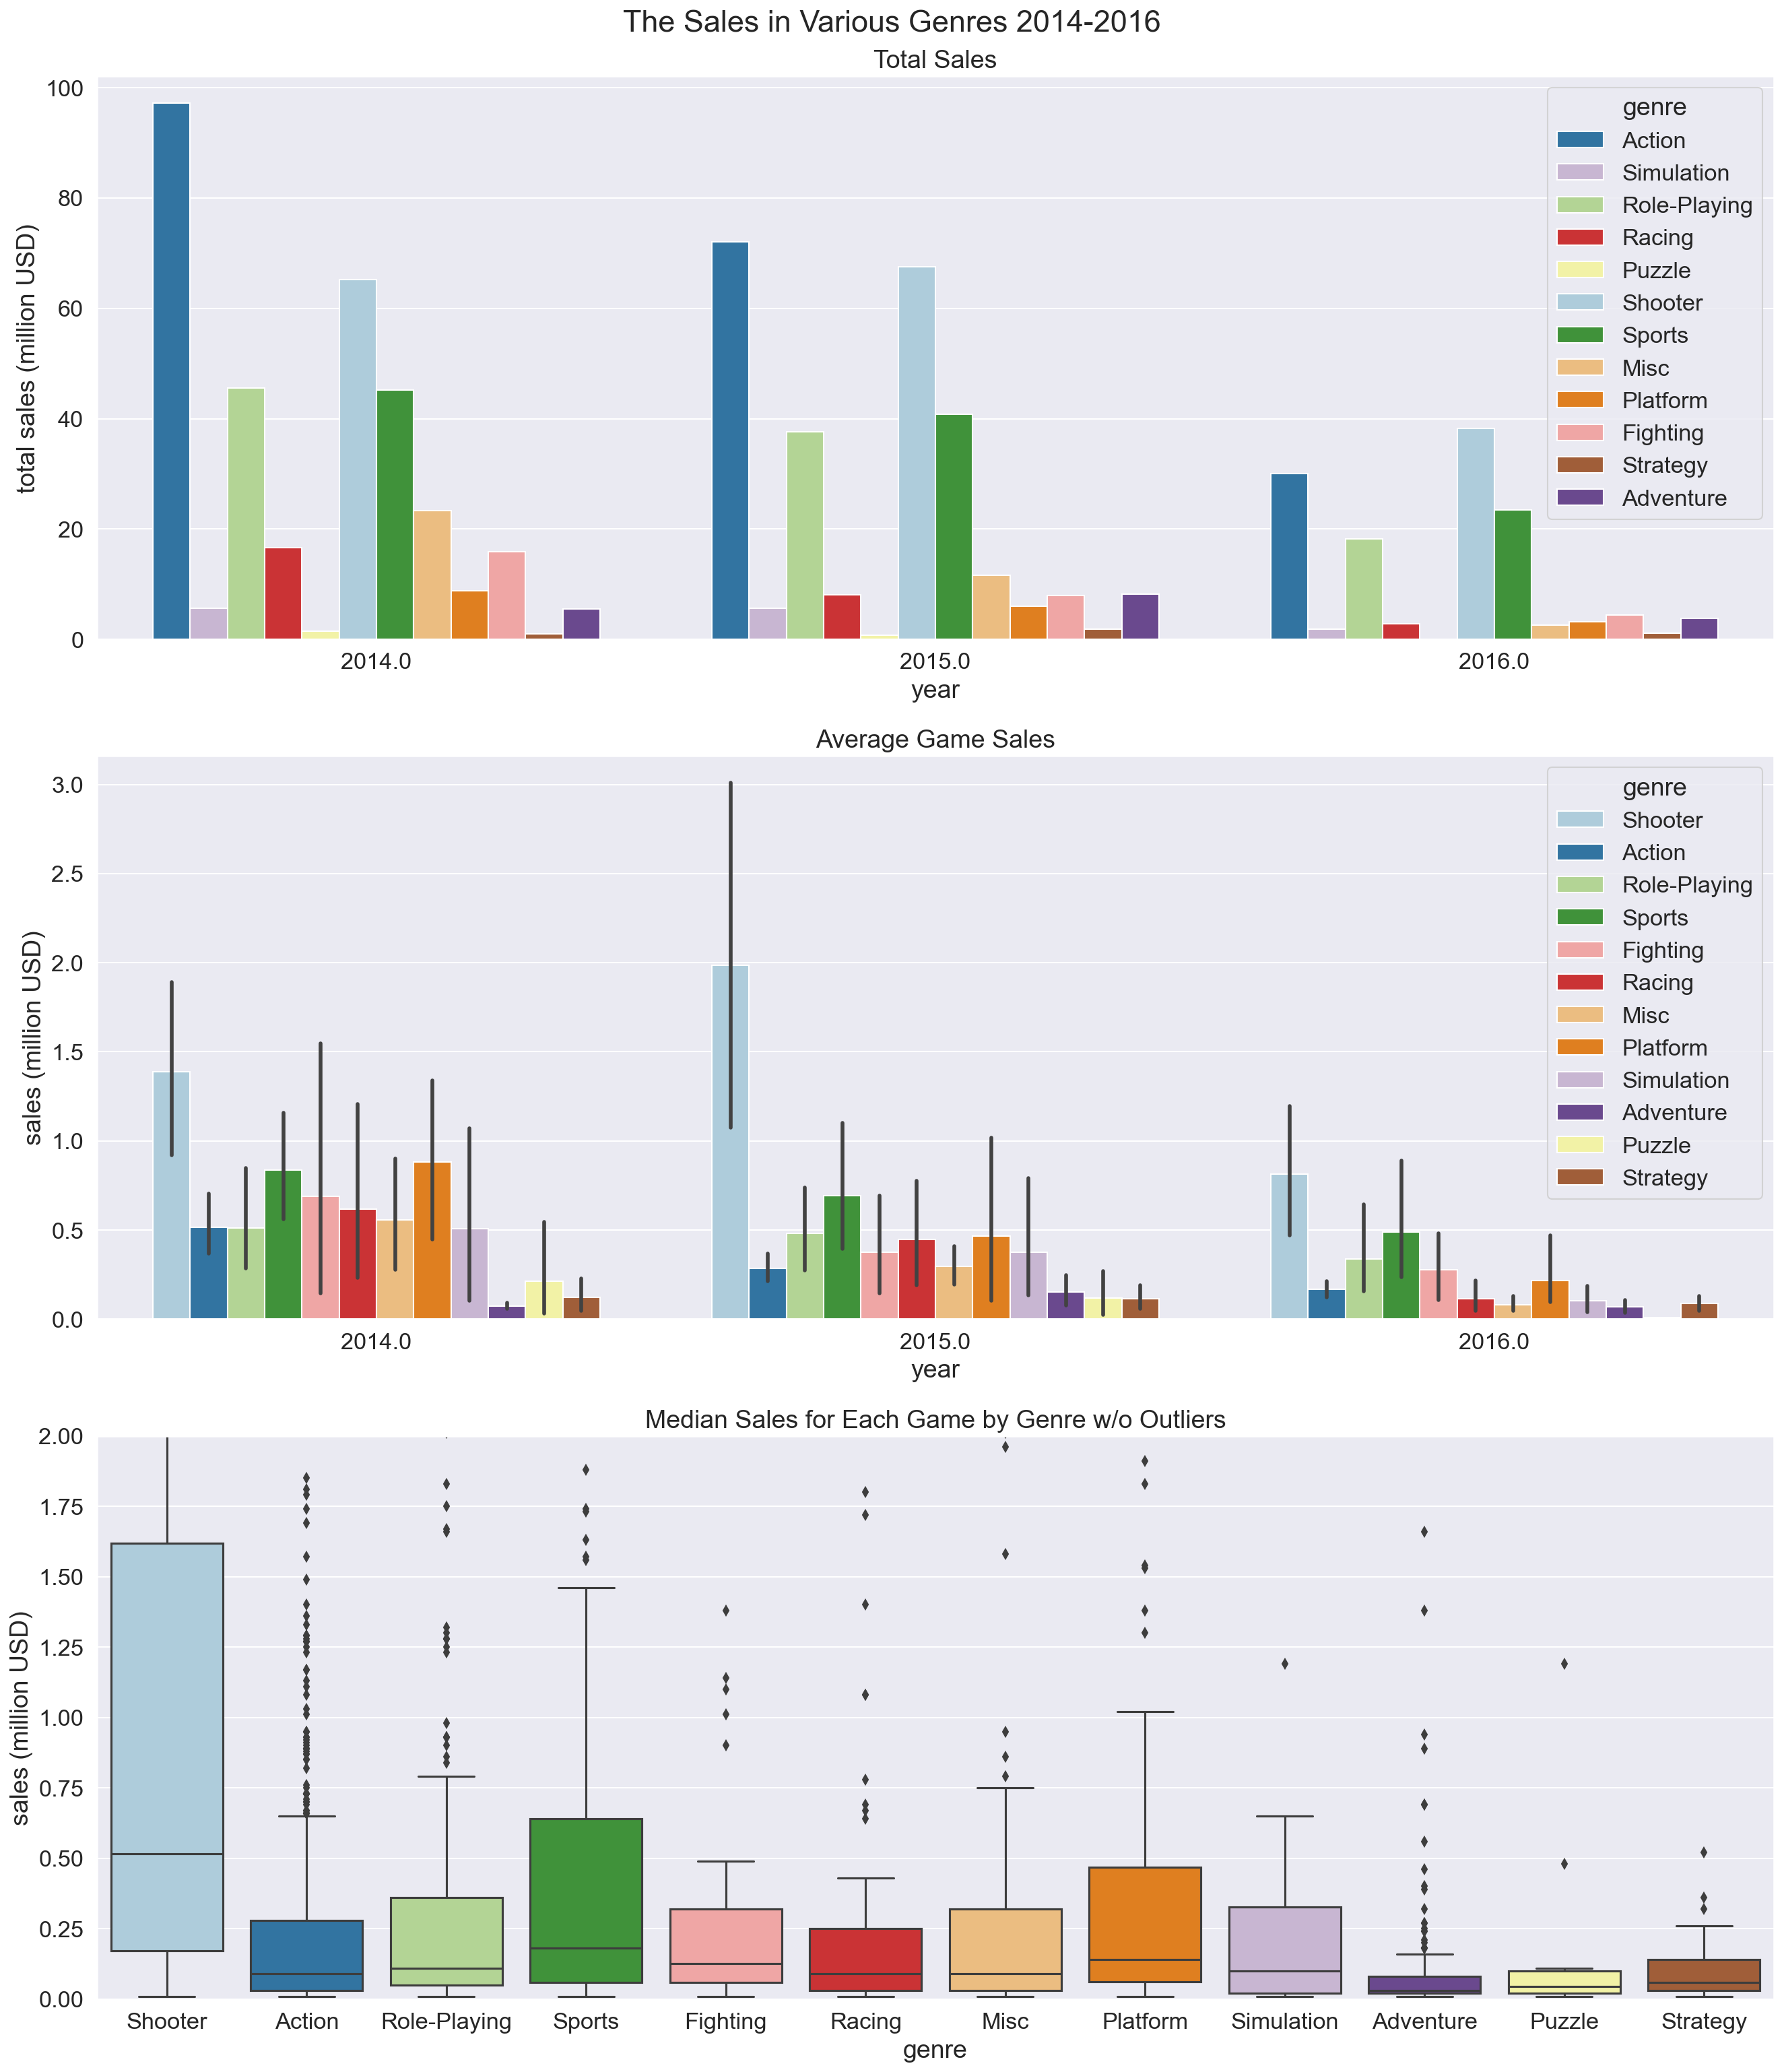

In [140]:
figure, axes = plt.subplots(3,1, figsize=(18,21), dpi=150)
figure.suptitle('The Sales in Various Genres 2014-2016')

# total sales by genre
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[0],
             data=sales_genre_last_year,
             x='year',
             y='sum',
             hue='genre',
             palette=mapped_color_palette_genre)
    .set(title='Total Sales', ylabel='total sales (million USD)')
)

# average game sales by genre
#------------------------------------------------------------------------------------------------
(sns.barplot(ax=axes[1],
            data=_3_last_year,
            y='total_sales',
            x='year',
            hue='genre',
            palette=mapped_color_palette_genre)
    .set(title='Average Game Sales', ylabel='sales (million USD)')
)

# Median Sales for each game by Genre w/o Outliers
#---------------------------------------------------------------------------------------------------------------------

(sns.boxplot(ax=axes[2], data=_3_last_year, y='total_sales', x='genre', palette=mapped_color_palette_genre)
    .set(title='Median Sales for Each Game by Genre w/o Outliers', ylabel='sales (million USD)', ylim=(0,2))
)


plt.tight_layout()
plt.show()

**Findings:**<br>
- The average game sales from various genres are different
- The average and median sales in `Shooter` games is the highest, followed by `Sport` and `Platform`, and `Role-Playing`

**Insights**<br>
- `Shooter` games tend to gain more sales than others
- The bigger the market shares by genre don't guarantee the sales of each game will be higher
- Although the `Action` genre was the highest total sales, the average sale of its' game was mediocre
- The genres that dominate the market sales are  `Action`, `Shooter`, `Sports`, and `Role-Playing`

**Recommendation**<br>
- The `Shooter` genre seems to be prospective in 2017 since most of the games in this genre gained higher sales than other genres for three consecutive years

#### Top Genres in Each Region

This section will check the top 5 genres in all regions by comparing the sales

In [141]:
# apply fuction in North America's sales to create cross tabular table
# check the result

genre_na_sales = cross_tab_sum(_3_last_year, 'year', 'genre', 'na_sales')
genre_na_sales

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
year,,,,,,,,,,,,
2014.0,0.293717,0.013609,0.052090,0.071596,0.022756,0.004461,0.044757,0.103198,0.233159,0.009602,0.149845,0.001210
2015.0,0.228243,0.027045,0.034625,0.045106,0.023302,0.000561,0.019558,0.130357,0.298896,0.011230,0.175650,0.005428
2016.0,0.206766,0.021144,0.040953,0.016915,0.028711,0.000000,0.016247,0.131093,0.361451,0.003561,0.167817,0.005342


In [142]:
# apply fuction in other regions' sales
# Europe
genre_eu_sales = cross_tab_sum(_3_last_year, 'year', 'genre', 'eu_sales')

# Japan
genre_jp_sales = cross_tab_sum(_3_last_year, 'year', 'genre', 'jp_sales')

# Other countries
genre_other_sales = cross_tab_sum(_3_last_year, 'year', 'genre', 'other_sales')

# Global
genre_total_sales = cross_tab_sum(_3_last_year, 'year', 'genre', 'total_sales')

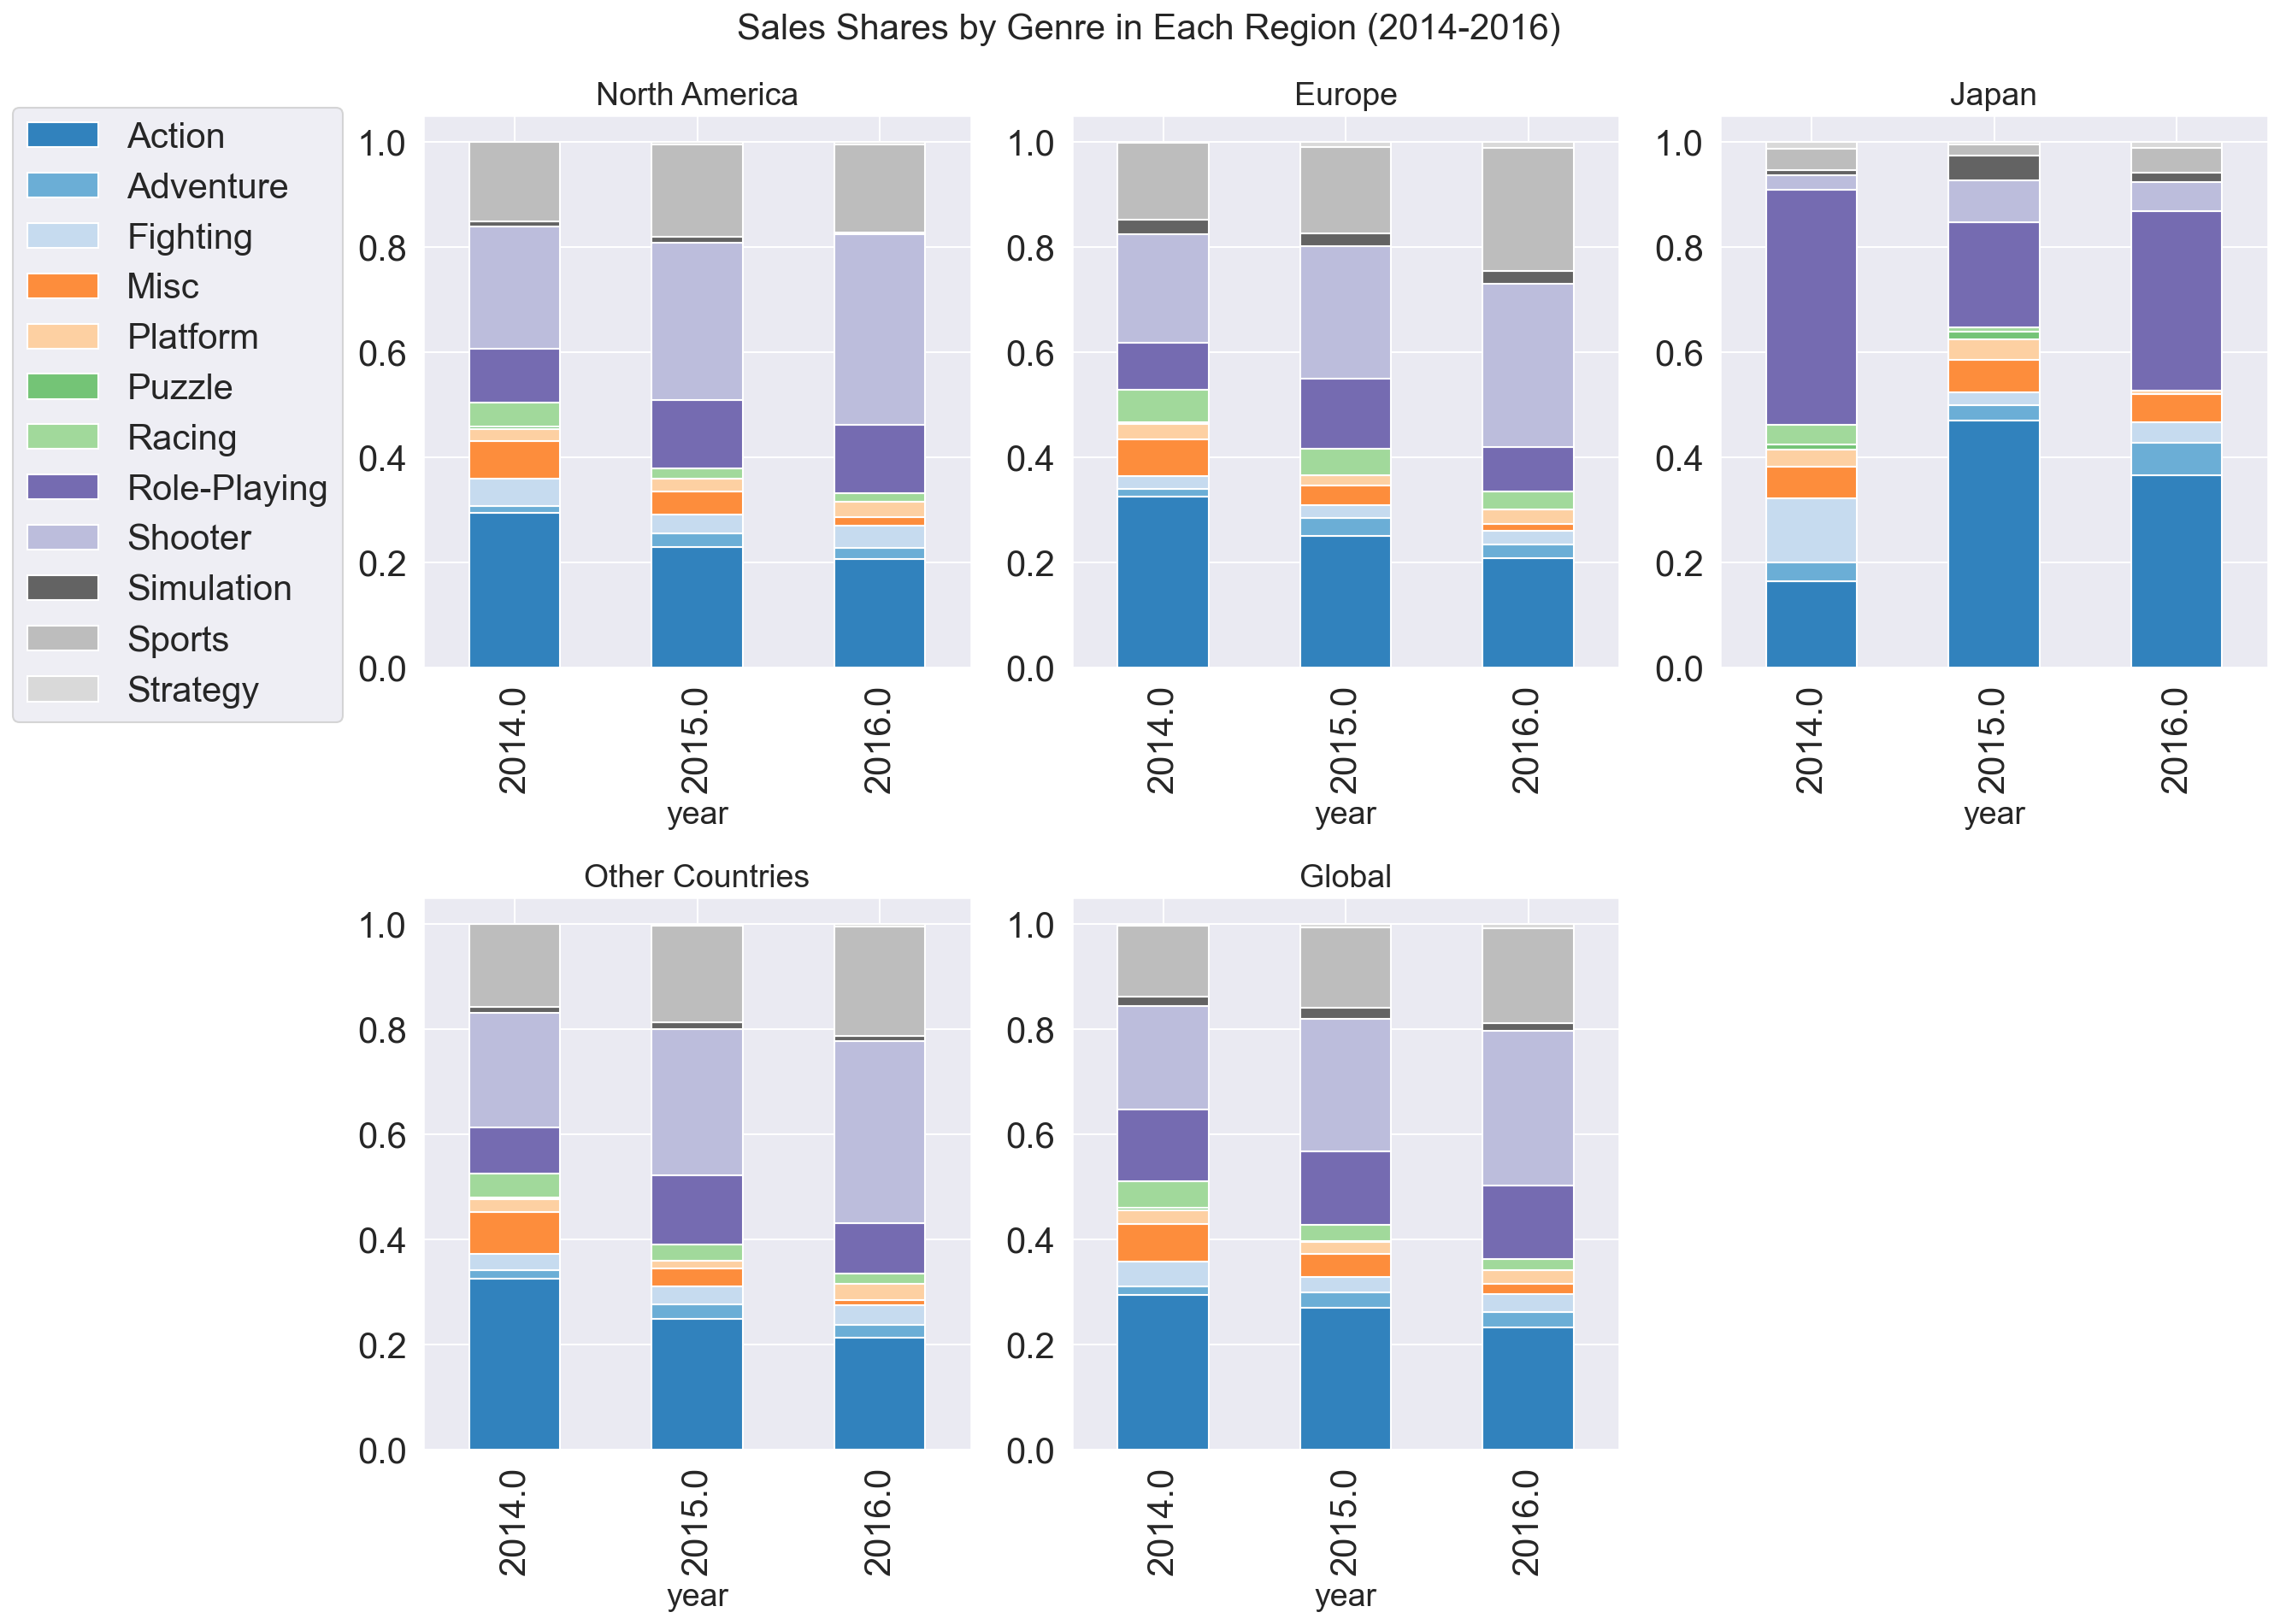

In [143]:
# display the sales shares by genre in stacked bar
# compare the shares in each region

fig, axes = plt.subplots(2,3, figsize=(18,13), dpi=150)
plt.suptitle('Sales Shares by Genre in Each Region (2014-2016)', fontsize=20)

genre_na_sales.plot(ax=axes[0,0], kind='bar', stacked=True, colormap='tab20c', title='North America', fontsize=20).legend(loc=(-0.75, -0.1), fontsize='20')
genre_eu_sales.plot(ax=axes[0,1], kind='bar', stacked=True, colormap='tab20c', title='Europe', fontsize=20, legend=False)
genre_jp_sales.plot(ax=axes[0,2], kind='bar', stacked=True, colormap='tab20c', title='Japan', fontsize=20, legend=False)
genre_other_sales.plot(ax=axes[1,0], kind='bar', stacked=True, colormap='tab20c', title='Other Countries', fontsize=20, legend=False)
genre_total_sales.plot(ax=axes[1,1], kind='bar', stacked=True, colormap='tab20c', title='Global', fontsize=20, legend=False)

# remove extra subplot
fig.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

In [144]:
# Display top 5 genres by each region
# loop and assign function 'top5_region'

region_sales = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']

for sales in region_sales:
    print(top5_region (_3_last_year, sales, 'genre'))
    print('---------------------------------------')

              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05
others           37.86
---------------------------------------
              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13
others           42.45
---------------------------------------
              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87
others           15.50
---------------------------------------
              other_sales
genre                    
Action              22.57
Shooter             21.53
Sports              14.36
Role-Playing         8.64
Misc                 4.03
others              10.49
---------------------------------------
              total_sales
genre                    
Action             199.36
Sh

**Findings:**

* `Action`, `Shooter`, `Sport`, `Role-Playing`, and `Misc` were the top 5 platforms that lead market sales in all regions, although the ratio could different
* The ratio sales by the platform in all regions are slightly different, unless in Japan
* The `Role-Playing` genre is more hype in Japan than in other regions
* Differ to other countries, the `Sports` genre has lower total sales
* During 3 consecutive years, the `Shooter` genre gained more


**Insight:**
* The ratio of sales shares by the genre changes slightly in recent years
* The top market shares by the genre in all regions are almost the same
* Japan has unique market shares by genre among the regions
* In Japan, the `Role-Playing` genre gets more enthusiasts while the `Sports` genre was the lower enthusiasts

### ESRB and Sales <a id='esrb_region'></a>

This section will identify the top 5 of ESRB based on the sales in several regions. ESRB evaluates a game's content and assigns an age rating. 

We will use data fromtwo last years (`_2_last_year`)

Here are the rating in ESRB:

* `E` = Everyone
* `M` = Mature
* `T` = Teen
* `E10+` = Everyone 10+ 
* `EC` = Early Childhood
* `RP` = Rating Pending – Likely Mature 17+ 

Several are `unknown`

In [145]:
# Display top 5 esrb rating by each region
# loop and assign function 'top5_region'

for sales in region_sales:
    print(top5_region (_2_last_year, sales, 'esrb_rating'))
    print('---------------------------------------')

             na_sales
esrb_rating          
M               47.03
unknown         37.44
E               26.59
T               22.86
E10+            17.87
---------------------------------------
             eu_sales
esrb_rating          
M               45.54
unknown         35.71
E               34.83
T               20.32
E10+            11.54
---------------------------------------
             jp_sales
esrb_rating          
unknown         32.89
T                7.70
E                5.25
M                4.29
E10+             3.27
---------------------------------------
             other_sales
esrb_rating             
M                  14.24
unknown            11.13
E                   8.57
T                   6.85
E10+                4.00
---------------------------------------
             total_sales
esrb_rating             
unknown           117.17
M                 111.10
E                  75.24
T                  57.73
E10+               36.68
----------------------------

In [146]:
# apply fuction in North America's sales
# check the result
esrb_na_sales = cross_tab_sum(_2_last_year, 'year', 'esrb_rating', 'na_sales')
esrb_na_sales

esrb_rating,E,E10+,M,T,unknown
year,,,,,
2015.0,0.174247,0.131574,0.293468,0.130170,0.270541
2016.0,0.177387,0.084799,0.348765,0.199199,0.189851


In [147]:
# apply fuction in other regions' sales
# Europe
esrb_eu_sales = cross_tab_sum(_2_last_year, 'year', 'esrb_rating', 'eu_sales')

# Japan
esrb_jp_sales = cross_tab_sum(_2_last_year, 'year', 'esrb_rating', 'jp_sales')

# Other countries
esrb_other_sales = cross_tab_sum(_2_last_year, 'year', 'esrb_rating', 'other_sales')

# Global
esrb_total_sales = cross_tab_sum(_2_last_year, 'year', 'esrb_rating', 'total_sales')

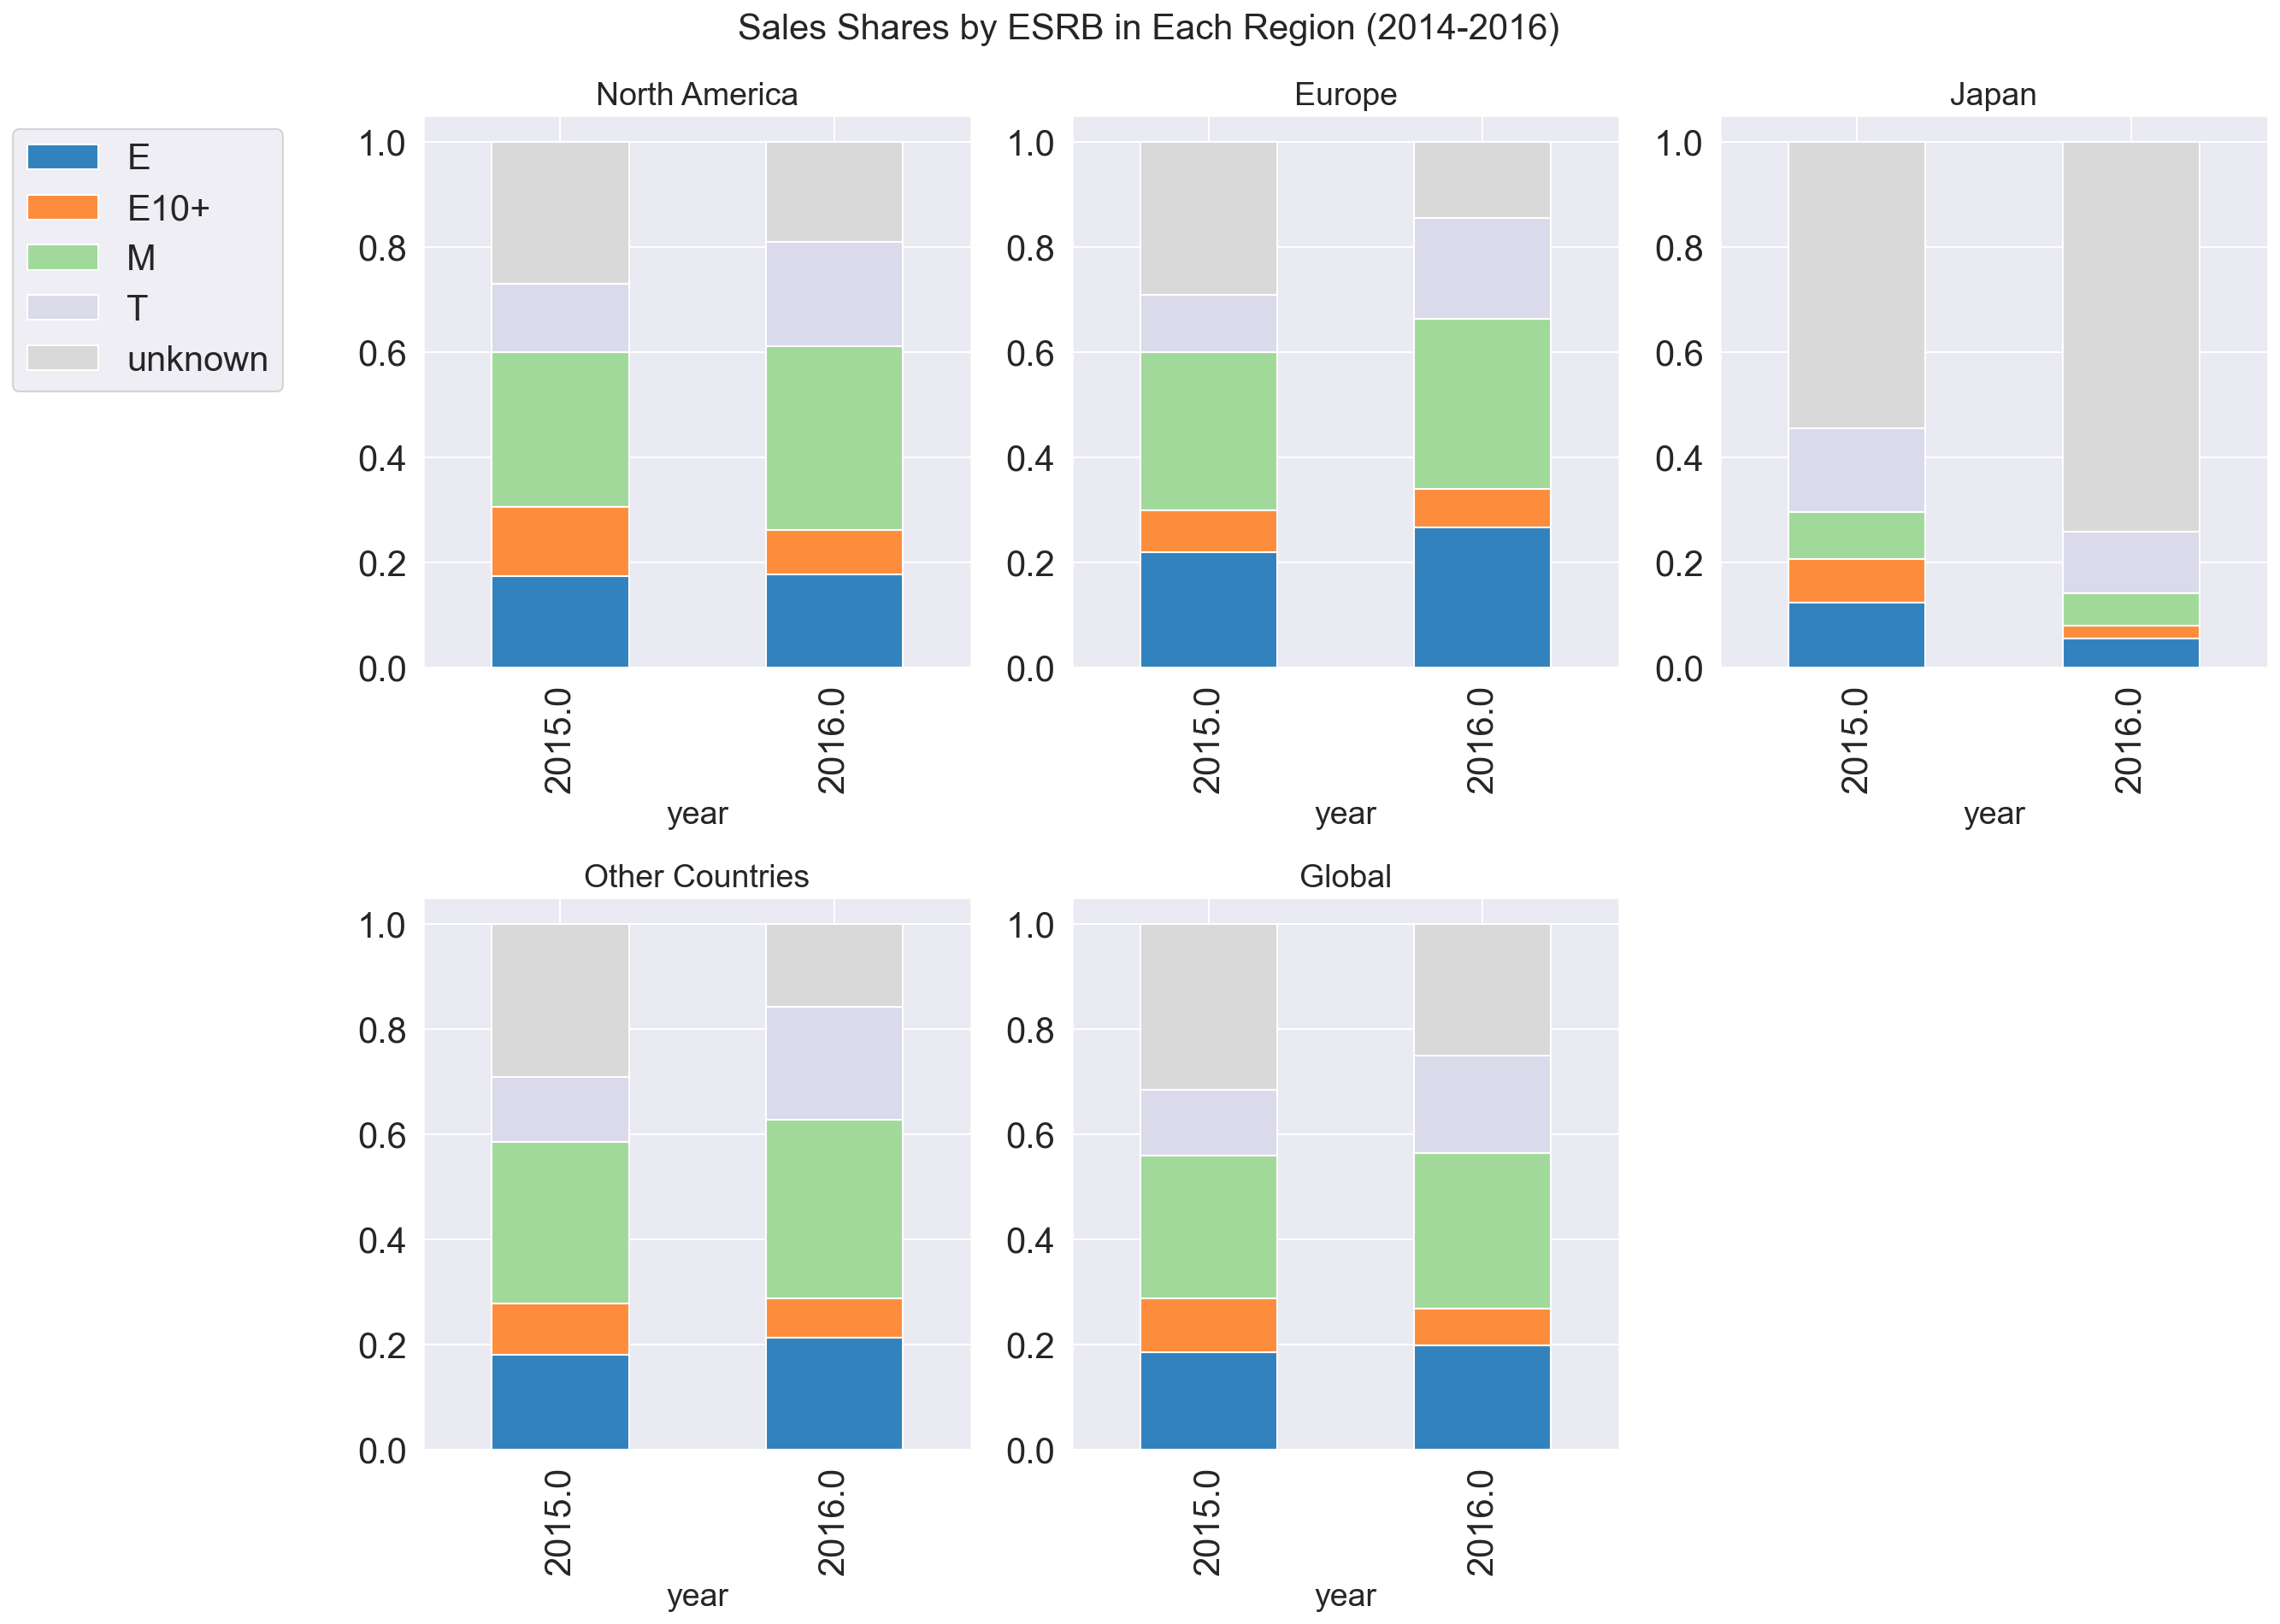

In [148]:
# display the sales shares by rating in stacked bar
# compare the shares in each region

fig, axes = plt.subplots(2,3, figsize=(18,13), dpi=150)
plt.suptitle('Sales Shares by ESRB in Each Region (2014-2016)', fontsize=20)

esrb_na_sales.plot(ax=axes[0,0], kind='bar', stacked=True, colormap='tab20c', title='North America', fontsize=20).legend(loc=(-0.75, 0.5), fontsize='20')
esrb_eu_sales.plot(ax=axes[0,1], kind='bar', stacked=True, colormap='tab20c', title='Europe', fontsize=20, legend=False)
esrb_jp_sales.plot(ax=axes[0,2], kind='bar', stacked=True, colormap='tab20c', title='Japan', fontsize=20, legend=False)
esrb_other_sales.plot(ax=axes[1,0], kind='bar', stacked=True, colormap='tab20c', title='Other Countries', fontsize=20, legend=False)
esrb_total_sales.plot(ax=axes[1,1], kind='bar', stacked=True, colormap='tab20c', title='Global', fontsize=20, legend=False)

# remove extra subplot
fig.delaxes(axes[1][2])

plt.tight_layout()
plt.show()

**Findings:**<br>

* The composition of the top five sales shares by ESRB in all regions are almost similar unless Japan
* In Japan, more than 50% of games have no ESRB rating
* From the highest to the lowest total sales in all regions, unless Japan: `Mature`, `Teen`, `Everyone`, and `Everyone 10+`

**Insight:**<br>
* Market sales by ESRB in Japan are unique and quite different in all regions
* Overall, The composition ratio of the sales by ESRB in all regions for two consecutive years are similar, unless Japan
* `Unknown` rating can come from unidentified ESRB or games that haven't been assessed by ESRB

**Recommendation**<br>
- Games that are categorized as `Mature`, `Teen` or `Everyone` seem to be prospective in 2017

### Study in Popular Platform and Games <a id='game_reviews'></a>

This section will check the correlation between reviews and sales, then display the correlation through a scatter plot diagram. We will also identify how the user and professional reviews affect sales for one popular platform (`PS4`). <br>
Additionally, we will compare the sales of the same games on other platforms.

#### PS4 : Reviews and Platform Sales

The data from 2015-2016 will be used.

In [149]:
# filter platform : PS4

ps4 = (_2_last_year.query("'PS4' in platform")[['name', 'critic_score', 'user_score', 'total_sales']])

ps4.sample(4)

,name,critic_score,user_score,total_sales
11610,Dragon's Dogma Online,NaN,NaN,0.08
5320,Mirror's Edge Catalyst,69.0,4.7,0.34
11963,Grand Kingdom,78.0,8.1,0.07
14222,Atelier Firis: The Alchemist of the Mysterious...,NaN,NaN,0.03


In [150]:
# check rows in PS4
len(ps4)

301

In [151]:
# check coefficient correlation
ps4.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.533330,0.392849
user_score,0.533330,1.000000,-0.059738
total_sales,0.392849,-0.059738,1.000000


<Figure size 1800x50 with 0 Axes>

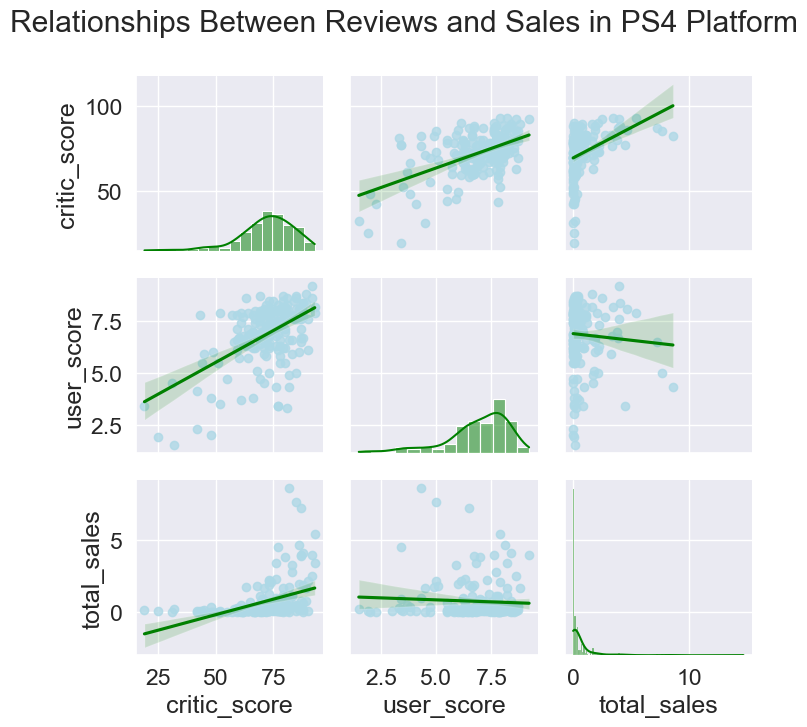

In [152]:
# display correlation matrix
# Scatter Matrix : Bivariate Relationships Between Combinations of Reviews and Sales

plt.figure(figsize=(18,0.5))


(sns.pairplot(ps4,
              kind='reg',
              diag_kws={'color' : 'green', 'kde' : True},
              plot_kws={'color' : 'green',
                        'scatter_kws': {'color':'lightblue'}})
    .fig.suptitle("Relationships Between Reviews and Sales in PS4 Platform")
)

plt.tight_layout()
plt.show()

**Findings:**<br>
*From the correlation coefficient table and pair plot diagram*<br>

* `critic_score` has a weak relationship (0.39) to the `total_sales` in `PS4`
* `user_score` has a negligible/very weak relationship (-0.06) to the `total_sales`
* `critic_score` has a moderate positive relationship (0.53) to `user_score`
* Both distributions on `critic_score` and `user_score` have positive skewed curve

**Insight:**<br>
* `critic_score` that comes from the Experts can be used to predict the `user_score` since it has a moderate positive relationship.
* `critic_score` seem to have a minor effect on the `total_sales`
* `user_score` didn't influence the `total_sales` of games in in `PS4`
* The `critic_score` and `user_score` in `PS4` seem to have fair to good ratings, since the distributions are in positively skewed

#### Popular Game Sales on Various Platform
First, we will choose two popular games from different genres based on the highest total sales from the recent years in this online store.

In [153]:
# check the most popular game

(_2_last_year[['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales']]
             .sort_values(by='total_sales', ascending=False)
             .head(10)
)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,14.63
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,7.98
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,7.60
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,7.39
105,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,7.17
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,7.14
171,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,1.85,2.50,0.19,5.39
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,2.07,1.71,0.08,4.62
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,4.49


**Note:**<br>
- From 2015, we wil choose `Call of Duty: Black Ops 3` (`Shooter`)
- From 2016, we will choose `FIFA 17` (`Sport`)

In [154]:
# filter dataframe for Popular game

cod3 = _2_last_year.query("'Call of Duty: Black Ops 3' in name")
fifa17 = _2_last_year.query("'FIFA 17' in name")

popular_games = pd.concat([cod3, fifa17])

# check the result
popular_games

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,esrb_rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,unknown,7.39
1049,Call of Duty: Black Ops 3,X360,2015.0,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,unknown,1.70
1062,Call of Duty: Black Ops 3,PS3,2015.0,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,unknown,1.69
6463,Call of Duty: Black Ops 3,PC,2015.0,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,unknown,0.26
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
571,FIFA 17,XOne,2016.0,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E,2.65
2782,FIFA 17,PS3,2016.0,Sports,0.05,0.55,0.03,0.10,NaN,3.3,E,0.73
5010,FIFA 17,X360,2016.0,Sports,0.07,0.28,0.00,0.03,NaN,1.7,E,0.38
9955,FIFA 17,PC,2016.0,Sports,0.00,0.11,0.00,0.01,84.0,4.2,E,0.12


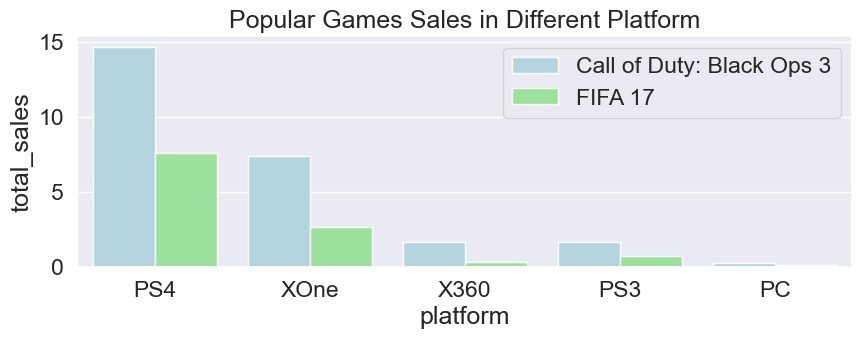

In [155]:
# create barplot

plt.figure(figsize=(10,3))
(sns.barplot(data=popular_games, x='platform', y='total_sales', hue='name', palette=['lightblue','lightgreen'])
    .set(title='Popular Games Sales in Different Platform')
)
 
plt.legend(loc='upper right');

**Findings:**

* Both popular games gained higher `total_sales` from platform  `X360`, `PS3`, `PS4`, and `XOne`
* The `Grand Theft Auto V` or `GTA` gained higher `total_sales` than `Minecraft`

**Insight:**

* Both games are popular but the `GTA` seems to gain more sales since the genre is `Action`, which is the top favorite genre among the users
* It seems that the genre's type can affect where the platform can be sold

### Intermediate Conclusions <a id='eda_insight'></a> 

- The distribution of total games from 1980-2016 has negatively skewed curve. It tended to increase during three decades (1980-2008) and started to be downward and inert during 2012 to 2016.
- To get the relevant data for creating model sales in 2017, we analyze the market shares by genre and platform. This suggested that using data from 3 last years for genre analysis and data from the last two years for the platform, ESRB rating, and reviews analysis
- For the last two consecutive years, `PS4` became the top market leader by having almost 50% sales shares global, followed by `XOne` and `3DS`
- The top platform leaders in all regions are almost similar unless Japan has unique platform preferences

- The result from genre analysis suggests that `Shooter` will be a prospective genre with high total sales in 2017, followed `Action`, `Sport`, and `Role-Playing`
- The top genres' shares in all regions are almost similar, but in Japan, the ratio of the shares for all genres is different

- The top rating in ESRB for all regions are almost similar unless Japan.
- It seems that `Mature`, `Teen`, and `Everyone` ratings will be prospective to gain high sales in 2017

- The `critic_score` and `user_score` have a minor effect on the total sales.

[Back to Contents](#back)

## Stage 4. Testing the hypotheses <a id='hypotheses'></a>

The hypotheses test will use a two-tailed t-test with an alpha level of 0.05.<br>

This section will test the average `user_score` in the two platforms (`XOne`, `PC`) and two genres (`Sports`, `Action`). Previously, we had identified the presence of NaN values in `user_score` and the high gap number of games on both platforms and genres. Thus, we will ensure to exclude the NaN values and hold prior variance checking (`levene_test`) before conducting the statistical hypotheses test.

All those steps will be packed in one function below. 

In [156]:
# create t_test function with prior variance checking

def t_test_ind(sample1, sample2, alpha=0.05):
    
    # check the variance and declare atribute `option_var` in t_test
    #---------------------------------------------------------------
    p_value_levene=st.levene(sample1, sample2).pvalue.astype(int)
    
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    
    # conducting t_test_ind
    #---------------------------------------------------------------
    p_value=st.ttest_ind(sample1, sample2, nan_policy='omit',
                         equal_var=option_var).pvalue.astype(int)

    if p_value<alpha:
        print('Reject H0 | Accept H1')
    else:
        print( "Accept H0 | Reject H1") 
        

### Hypothesis 1: User Scores XOne VS PC Platforms <a id='ratings_platform'></a>

- H0 = Average `user_score` of the `XOne` and `PC` platforms are the same
- H1 = Average `user_score` of the `XOne` and `PC` platforms are not the same

In [157]:
# filter user_score in Xone
xone_user_score = _2_last_year.query("platform == 'XOne'")[['name', 'platform', 'year', 'user_score']]

# check the result
xone_user_score.sample(3)

,name,platform,year,user_score
4095,Plants vs. Zombies: Garden Warfare 2,XOne,2016.0,8.1
12516,Attack on Titan (KOEI),XOne,2016.0,NaN
13982,NASCAR Heat Evolution,XOne,2016.0,1.6


In [158]:
# filter user_score in PC
pc_user_score = _2_last_year.query("platform == 'PC'")[['name', 'platform', 'year', 'user_score']]

# check the result
pc_user_score.sample(3)

,name,platform,year,user_score
16337,Battle Worlds: Kronos,PC,2016.0,7.1
16330,MXGP 2,PC,2016.0,NaN
15660,The Crew: Wild Run,PC,2015.0,7.4


In [159]:
# conduct two-tailed t_test_ind
t_test_ind(xone_user_score['user_score'], pc_user_score['user_score'], alpha=0.05)

Reject H0 | Accept H1


**Verdic:**<br>
The average `user_score` of the `XOne` is considered significantly different from `PC` platforms, resulting in a p-value less than 0.05. <br>
Since accept H1, we will check which average `user_score` that is higher or lower. 

In [160]:
# compare the average of user_score in XOne and PC

xone_user_score['user_score'].mean() > pc_user_score['user_score'].mean()

True

**Conclusion:**

The average `user_score` of `XOne` **is greater than** the average `user_score` of `PC` platform. The gap value between both platforms are different significantly with the region of acceptance is 95%.

### Hypothesis 2: User Scores Action VS Sports Genres <a id='ratings_genre'></a>

- H0 = Average `user_score` of the `Action` and `Sports` genres are the same
- H1 = Average `user_score` from the `Action` is greater than the `user_score` from `Sports`

In [161]:
# filter user_score in Action
action_user_score = _2_last_year.query("genre == 'Action'")[['name', 'genre', 'year', 'user_score']]

# check the result
action_user_score.sample(3)

,name,genre,year,user_score
13694,Gravity Falls: Legend of the Gnome Gemulets,Action,2015.0,5.8
6592,One Piece: Pirate Warriors 3,Action,2015.0,3.7
14157,Sengoku Basara: Sanada Yukimura-Den,Action,2016.0,NaN


In [162]:
# filter user_score in Sports
sports_user_score = _2_last_year.query("genre == 'Sports'")[['name', 'genre', 'year', 'user_score']]

# check the result
sports_user_score.sample(3)

,name,genre,year,user_score
13928,Don Bradman Cricket 14,Sports,2015.0,NaN
16124,WRC 5: FIA World Rally Championship,Sports,2015.0,NaN
12756,Rugby World Cup 2015,Sports,2015.0,1.9


In [163]:
# conduct two-tailed t_test_ind
t_test_ind(action_user_score['user_score'], sports_user_score['user_score'], alpha=0.05)

Reject H0 | Accept H1


**Verdic:**<br>
The average `user_score` of the `Action` is considered significantly different from `Sports` genres, resulting in a p-value less than 0.05. <br>
Since accept H1, we will check which average `user_score` that is higher or lower. 

In [164]:
# compare the average of user_score in Action and Sports
action_user_score['user_score'].mean() > sports_user_score['user_score'].mean()

True

**Conclusion:**

The average `user_score` from `Action` **is greater than** the average `user_score` from `Sports` genre. The gap value between both genres are different significantly with the region of acceptance is 95%.

# General Conclusions <a id='end'></a>

When preparing the data, we discovered:
1. The header or columns' names were capitalized by each word. For convenience, we formatted it in lowercase 
2. The majority of the values in `year`, `critic_score`, `user_score`, and `rating` were missing. After investigating the missingness, we decide not to change the NaN values in `year`, `critic_score`, and `user_score`. The NaN values will be easier to be excluded in further analysis. We also change the `tbd` and `0` values in `user_score` with NaN. For the `esrb_rating`, the NaN values were replaced with `'unknown'`. 
3. The datatype in column `user_score` was inappropriate. We replaced the datatype to ease the calculation
4. For further analysis, we calculated the sales for all regions (na, eu, jp, other) in a new column (`total_sales`)

The data preprocessing above generated `clean_df`.<br>

To get insight from the `clean_df`, we conducted EDA. Here is the recap from the analysis:
- Initially, we tried to identify the distribution of total games from 1980-2016. The distribution has a negatively skewed curve. It suggested that the number of games increased during three decades (1980-2008) and started to be downward and inert from 2012 to 2016.

- To get the relevant data, we analyzed the market shares by genre and platform. These results suggested that using data from 3 last years for genre analysis and data from the last two years for the platform, ESRB rating, and reviews analysis

- After analyzing the platform and sales, we found that `PS4` became the top market leader by having almost 50% sales shares globally, followed by `XOne` and `3DS`, for the last two consecutive years. The top platform leaders in all regions were almost similar unless Japan. Japan has unique platform preferences. 

- The result from genre analysis suggested that `Shooter` will be a prospective genre with high total sales in 2017, followed by `Action`, `Sports`, and `Role-Playing`. The top genres' shares in all regions were almost similar, but in Japan, the ratio of the shares was different

- The top rating in ESRB for all regions were almost similar unless Japan. It seems that `Mature`, `Teen`, and `Everyone` ratings will be prospective to gain high sales in 2017. Another founding was the minor effect of the `critic_score` and `user_score` on the total sales.

We also conducted statistical hypotheses test on `user_score` for chosen platforms (`XOne`, `PC`) and genres (`Action`, `Sports`). The Levene test was performed initially, then using a two-tailed t-test with alpha 0.05, we did a different test. <br>

The test suggested that both null hypotheses failed to be rejected since the p-values below the alpha. That means the `user_score` between both platforms and both genres were different significantly. After performing further analysis, we found that the average `user_score` in `XOne` is greater than `PC` and the average `user_score` in the `Action` genre is higher than in the `Sports` genre.

[Back to Contents](#back)